In [2]:
%pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import pandas as pd

# Load the data
file_path = r'C:\Users\dharris\Downloads\Data_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Project Name,Document Type,Document name,Type of project,DQA Reviewer,Review number,Date Received,Review Date,Mont/year,Days,Effort (h),Num of pages,Number of comments,Comments/Page
0,Electronic Laboratory Notebook (ELN),Data Migration Plan,Data Migration Plan,Non-Operational,Paul Snook,2,15-Dec-23,02-Jan-24,Jan-24,12,1.25,18,2.0,0.11
1,Electronic Laboratory Notebook (ELN),Data Migration Plan,Data Migration Plan,Non-Operational,Paul Snook,1,15-Dec-23,02-Jan-24,Jan-24,12,0.41,28,1.0,0.05
2,Veeva Clinical Vault,Data Migration Plan,Data Migration Plan. Migration of Zymeworks Ve...,Operational,Angels Jimenez,1,21-Dec-23,03-Jan-24,Jan-24,9,0.4,17,20.0,1.18
3,Jazz Argus 8.4,Test Cases/Scripts (Pre Testing),ARG-OQ - CIOMS Listings,Non-Operational,Rhys Davies,1,21-Dec-23,04-Jan-24,Jan-24,10,0.5,145,0.0,0.00
4,Veeva Clinical Vault,Data Migration Plan,Data Migration Plan. Migration of Zymeworks Ve...,Operational,Angels Jimenez,1,21-Dec-23,03-Jan-24,Jan-24,9,0.41,28,1.0,0.05


In [5]:
# Check for column names to identify any inconsistencies or hidden characters
df.columns

Index(['Project Name', 'Document Type', 'Document name', 'Type of project',
       'DQA Reviewer', 'Review number', 'Date Received', 'Review Date',
       'Mont/year', 'Days ', 'Effort (h)', 'Num of pages',
       'Number of comments', 'Comments/Page'],
      dtype='object')

In [6]:
# Strip any trailing or leading spaces from column names
df.columns = df.columns.str.strip()

In [7]:
# Basic data preparation
df['Date Received'] = pd.to_datetime(df['Date Received'], format='%d-%b-%y', errors='coerce')
df['Review Date'] = pd.to_datetime(df['Review Date'], format='%d-%b-%y', errors='coerce')

numeric_cols = ['Days', 'Effort (h)', 'Num of pages', 'Number of comments']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Advanced feature engineering
df['Month'] = df['Date Received'].dt.month
df['Day_of_Week'] = df['Date Received'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# Calculate efficiency score for each row
df['Efficiency_Score'] = 100 * (df['Days'] <= 2).astype(float)
df['Comments_per_Page'] = df['Number of comments'] / df['Num of pages']

In [ ]:
# Check overall summary statistics
df.describe()
print(df)

,Review number,Date Received,Review Date,Days,Effort (h),Num of pages,Number of comments,Comments/Page,Month,Day_of_Week,Is_Weekend,Efficiency_Score,Comments_per_Page
count,5836.000000,5836,5836,5836.000000,5834.000000,5836.000000,5786.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5784.000000
mean,1.367032,2024-06-07 08:56:25.332419584,2024-06-08 10:50:39.890336,0.771419,0.355353,27.361206,1.060318,0.120487,5.740576,2.172721,0.036669,92.700480,0.116347
min,1.000000,2023-12-15 00:00:00,2024-01-02 00:00:00,0.000000,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2024-03-15 00:00:00,2024-03-18 00:00:00,0.000000,0.100000,6.000000,0.000000,0.000000,3.000000,1.000000,0.000000,100.000000,0.000000
50%,1.000000,2024-05-29 00:00:00,2024-05-30 00:00:00,0.000000,0.300000,18.000000,1.000000,0.050000,5.000000,2.000000,0.000000,100.000000,0.037037
75%,2.000000,2024-09-02 00:00:00,2024-09-03 00:00:00,1.000000,0.490000,25.000000,1.000000,0.070000,9.000000,3.000000,0.000000,100.000000,0.052632
max,9.000000,2024-12-23 00:00:00,2024-12-23 00:00:00,29.000000,10.000000,4446.000000,35.000000,6.330000,12.000000,6.000000,1.000000,100.000000,6.333333
std,0.712698,NaN,NaN,2.175783,0.375454,94.929807,2.126751,0.349295,3.355826,1.518912,0.187964,26.015092,0.351601


In [9]:
# Checking the distribution of lead time (Days) to see if we are achieving the 2-day target
lead_time_summary = df['Days'].describe()

# Identifying records where lead time exceeds 2 days
delayed_projects = df[df['Days'] > 2]

# Checking the types of projects causing delays
delayed_project_types = delayed_projects['Type of project'].value_counts()

# Checking which documents/projects require more than one review
multiple_reviews = df[df['Review number'] > 1]['Project Name'].value_counts()

# Checking the distribution of effort across DQA Reviewers
reviewer_distribution = df.groupby('DQA Reviewer')['Effort (h)'].sum().sort_values(ascending=False)

# Display summary statistics and insights
print(lead_time_summary)
print(delayed_projects)
print(delayed_project_types)
print(multiple_reviews)
print(reviewer_distribution)

count    5836.000000
mean        0.771419
std         2.175783
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        29.000000
Name: Days, dtype: float64
                              Project Name  \
0     Electronic Laboratory Notebook (ELN)   
1     Electronic Laboratory Notebook (ELN)   
2                     Veeva Clinical Vault   
3                           Jazz Argus 8.4   
4                     Veeva Clinical Vault   
...                                    ...   
5512    Biostatistics Data Analysis System   
5513    Biostatistics Data Analysis System   
5527                            ASAP Prime   
5535                               Dataiku   
5544                        Infrastructure   

                            Document Type  \
0                     Data Migration Plan   
1                     Data Migration Plan   
2                     Data Migration Plan   
3        Test Cases/Scripts (Pre Testing)   
4                     Data 

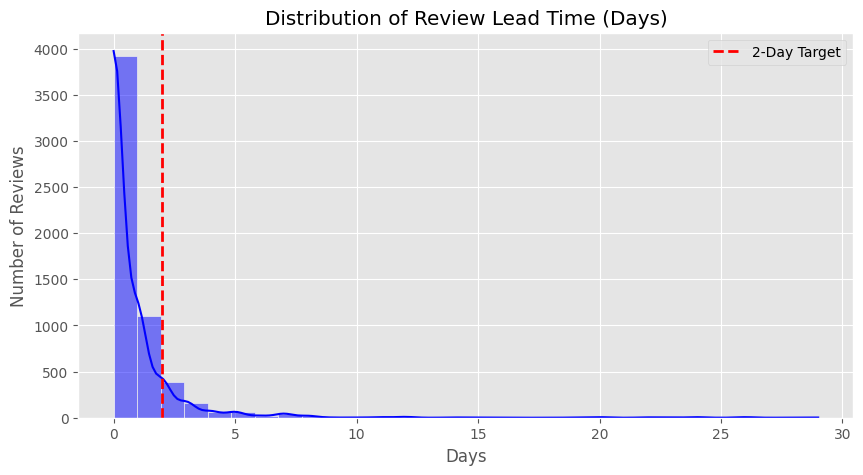

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')

# 1. Distribution of Lead Time (Days)
plt.figure(figsize=(10, 5))
sns.histplot(df['Days'], bins=30, kde=True, color="blue")
plt.axvline(x=2, color='red', linestyle='dashed', linewidth=2, label="2-Day Target")
plt.title("Distribution of Review Lead Time (Days)")
plt.xlabel("Days")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

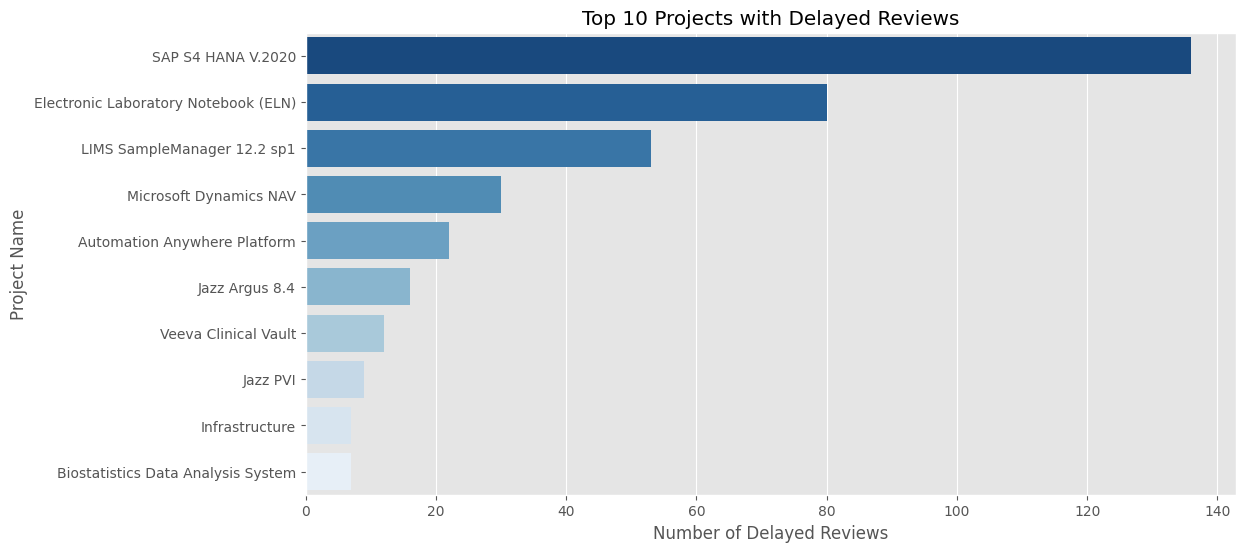

In [11]:
# 2. Projects with the Most Delays
delayed_projects_count = delayed_projects['Project Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=delayed_projects_count.index, x=delayed_projects_count.values, palette="Blues_r")
plt.title("Top 10 Projects with Delayed Reviews")
plt.xlabel("Number of Delayed Reviews")
plt.ylabel("Project Name")
plt.show()

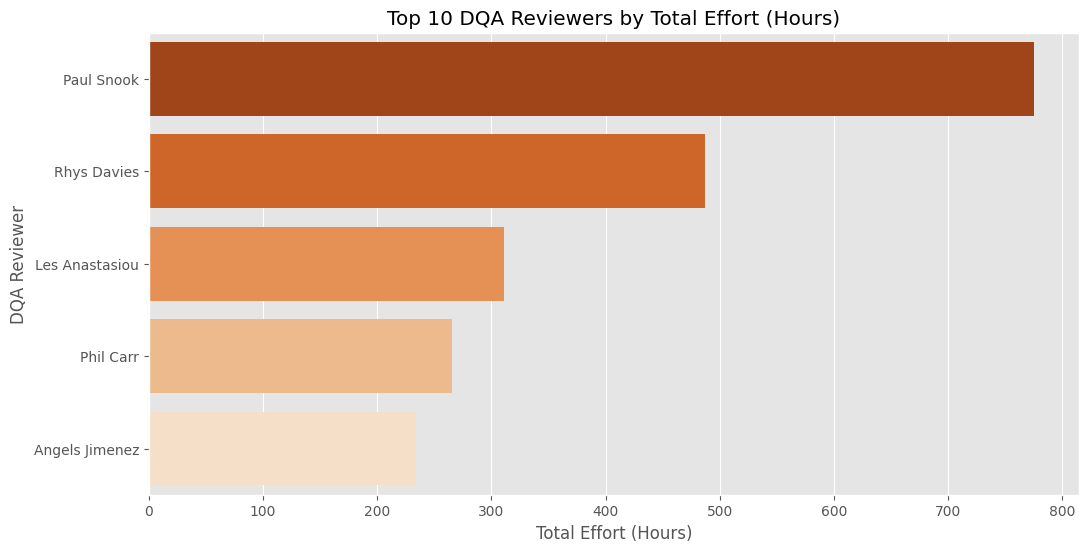

In [12]:
# 3. Review Effort Distribution Across Reviewers
reviewer_effort = df.groupby('DQA Reviewer')['Effort (h)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=reviewer_effort.index, x=reviewer_effort.values, palette="Oranges_r")
plt.title("Top 10 DQA Reviewers by Total Effort (Hours)")
plt.xlabel("Total Effort (Hours)")
plt.ylabel("DQA Reviewer")
plt.show()

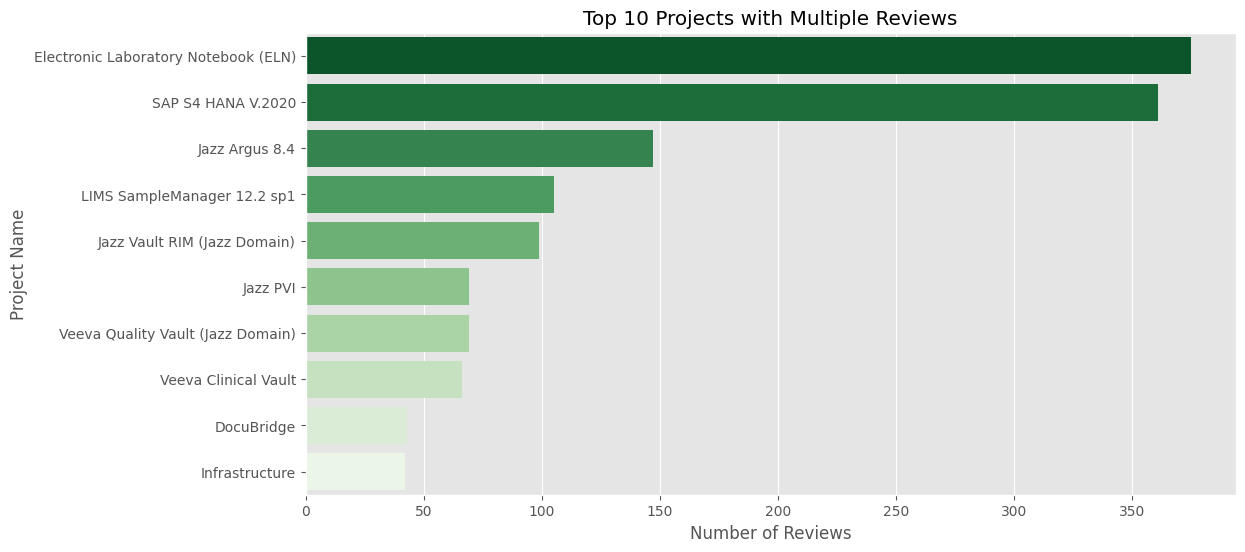

In [13]:
# 4. Number of Reviews per Project (Top 10 Projects)
multiple_reviews_count = multiple_reviews.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=multiple_reviews_count.index, x=multiple_reviews_count.values, palette="Greens_r")
plt.title("Top 10 Projects with Multiple Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Project Name")
plt.show()

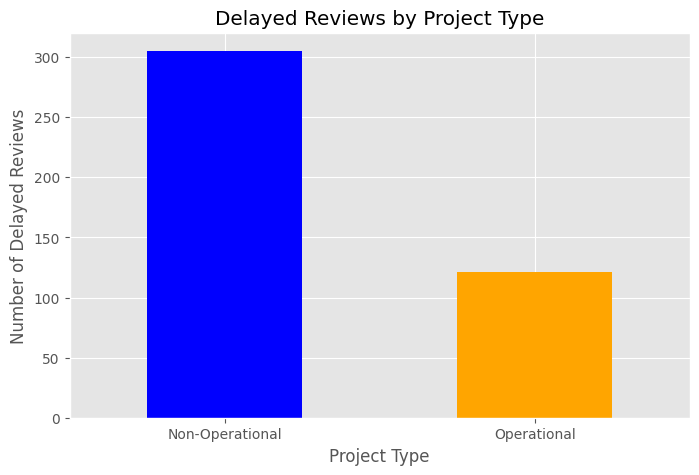

In [14]:
# 5. Type of Projects Causing Delays
plt.figure(figsize=(8, 5))
delayed_project_types.plot(kind="bar", color=["blue", "orange"])
plt.title("Delayed Reviews by Project Type")
plt.xlabel("Project Type")
plt.ylabel("Number of Delayed Reviews")
plt.xticks(rotation=0)
plt.show()

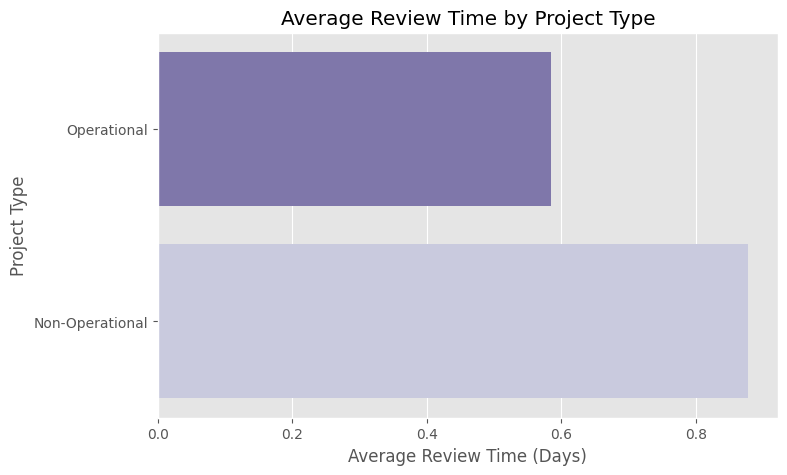

In [15]:
# 6. Average Review Time per Project Type
avg_review_time = df.groupby("Type of project")["Days"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(y=avg_review_time.index, x=avg_review_time.values, palette="Purples_r")
plt.title("Average Review Time by Project Type")
plt.xlabel("Average Review Time (Days)")
plt.ylabel("Project Type")
plt.show()

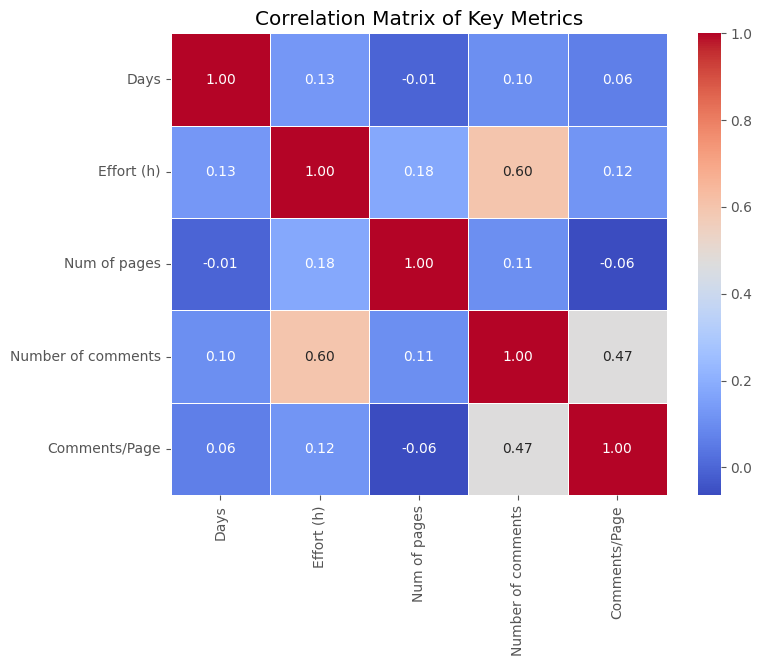

            Number of comments
Effort (h)            0.598072


In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_cols = ['Days', 'Effort (h)', 'Num of pages', 'Number of comments', 'Comments/Page']
df_corr = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Metrics")
plt.show()

# Identify strong correlations
correlation_threshold = 0.5  # Moderate to strong correlation threshold
strong_correlations = df_corr[(df_corr > correlation_threshold) | (df_corr < -correlation_threshold)]
strong_correlations = strong_correlations.where(np.triu(np.ones(strong_correlations.shape), k=1).astype(bool))

strong_correlations.dropna(how='all', inplace=True)
strong_correlations.dropna(axis=1, how='all', inplace=True)

# Display correlations above threshold
print(strong_correlations)

In [17]:
def calculate_reviewer_efficiency(data):
    """Calculate efficiency metrics for each reviewer."""
    reviewer_stats = data.groupby('DQA Reviewer').agg(
        Avg_Days=('Days', 'mean'),
        Efficiency_Score=('Days', lambda x: calculate_efficiency_score(x)),
        Total_Reviews=('Project Name', 'count'),
        Total_Effort=('Effort (h)', 'sum'),
        Total_Comments=('Number of comments', 'sum')
    ).reset_index()  # Ensure reviewer names remain a normal column
    
    # Round numeric values
    reviewer_stats = reviewer_stats.round(2)
    
    return reviewer_stats

    
    # Flatten multi-level columns
    reviewer_stats.columns = reviewer_stats.columns.get_level_values(0)
    
    # Round numeric values
    reviewer_stats = reviewer_stats.round(2)
    
    return reviewer_stats

In [18]:
def calculate_efficiency_score(days):
    """Calculate efficiency score as percentage of reviews within 2 days"""
    return (days <= 2).mean() * 100

In [19]:
# Calculate efficiency score for each row
df['Efficiency_Score'] = 100 * (df['Days'] <= 2).astype(float)
df['Comments_per_Page'] = df['Number of comments'] / df['Num of pages']
# Calculate reviewer efficiency
reviewer_stats = calculate_reviewer_efficiency(df)
print(reviewer_stats)

     DQA Reviewer  Avg_Days  Efficiency_Score  Total_Reviews  Total_Effort  \
0  Angels Jimenez      0.75             89.81            962        234.12   
1  Les Anastasiou      0.14            100.00            713        310.99   
2      Paul Snook      1.23             88.76           2002        775.71   
3       Phil Carr      0.64             92.64            625        265.23   
4     Rhys Davies      0.54             96.28           1534        487.08   

   Total_Comments  
0          1116.0  
1           899.0  
2          2285.0  
3           862.0  
4           973.0  


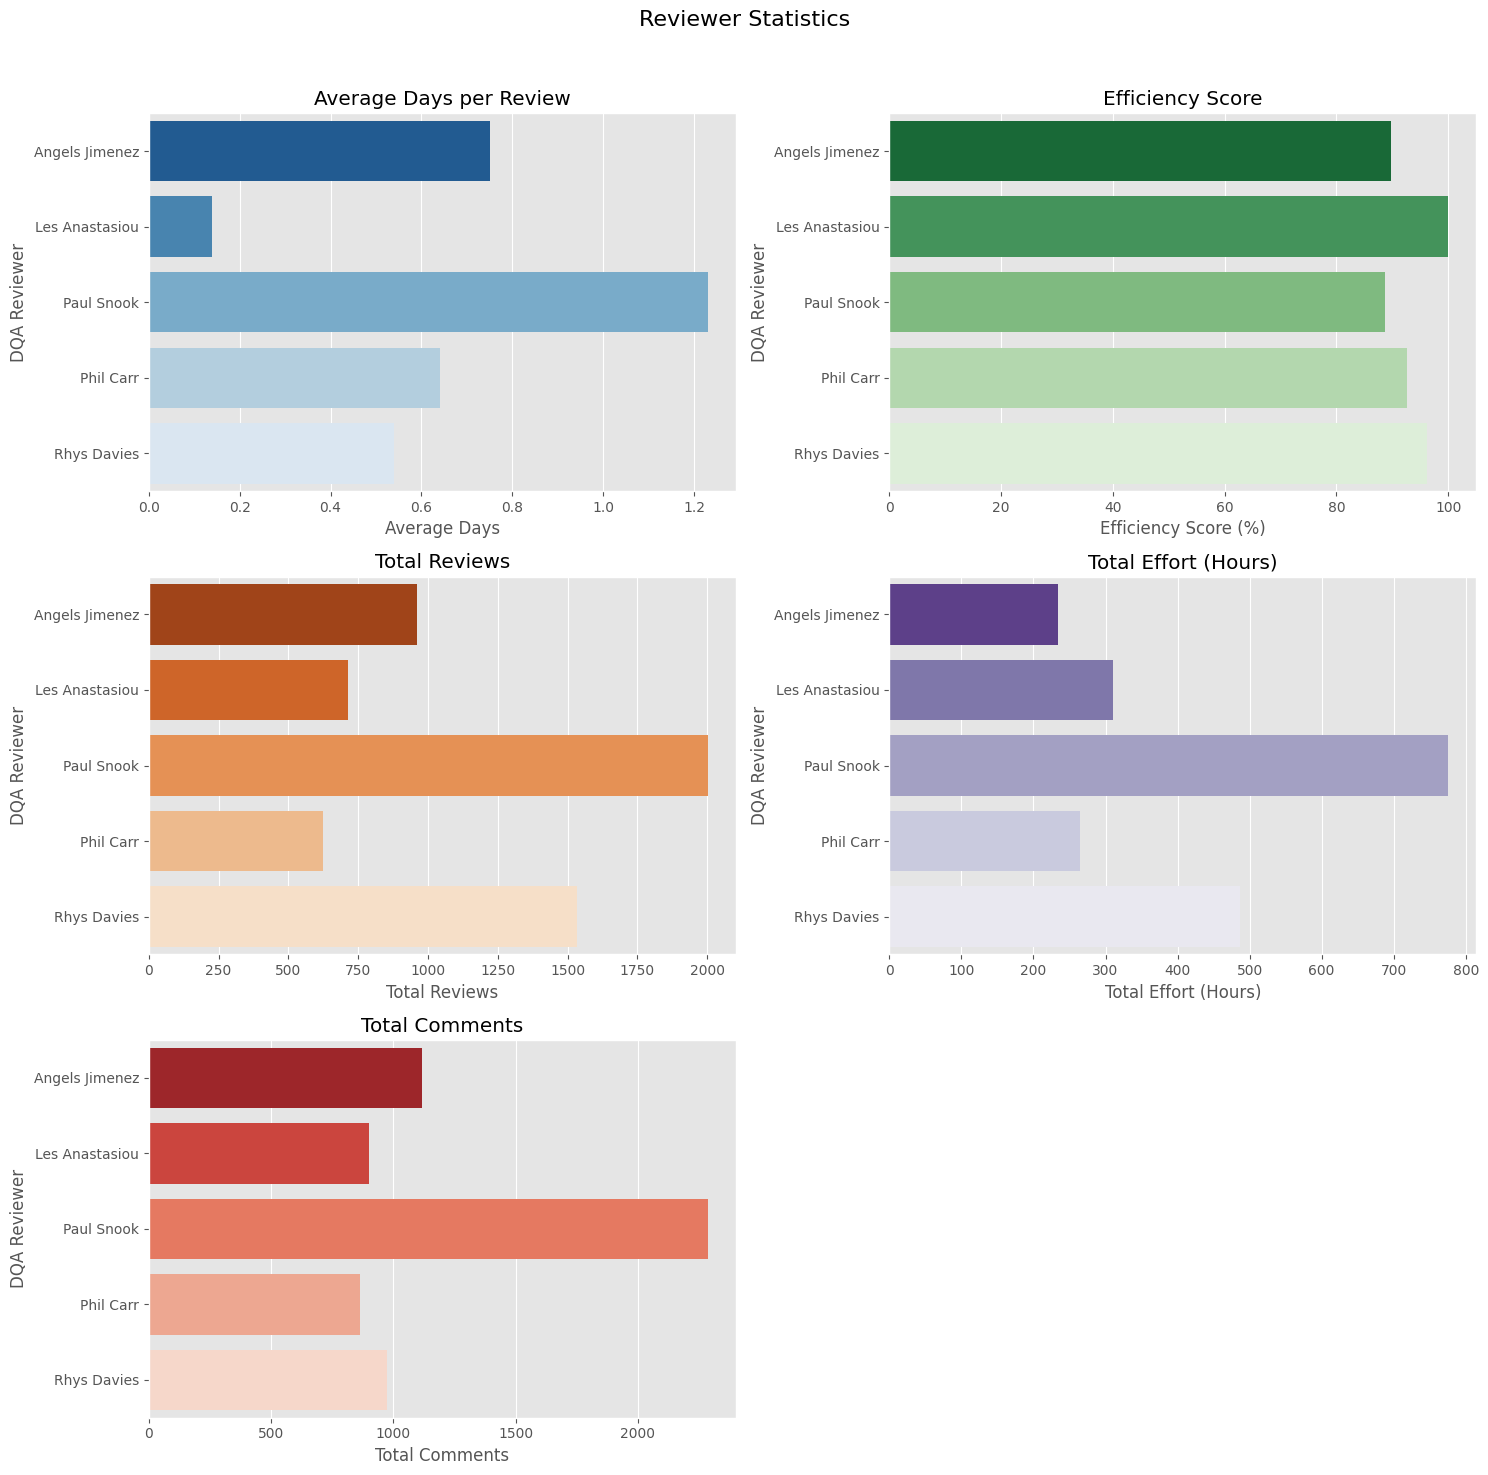

In [20]:
# Set up the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Reviewer Statistics', fontsize=16)

# Plot Avg_Days
sns.barplot(ax=axes[0, 0], x='Avg_Days', y='DQA Reviewer', data=reviewer_stats, palette='Blues_r')
axes[0, 0].set_title('Average Days per Review')
axes[0, 0].set_xlabel('Average Days')
axes[0, 0].set_ylabel('DQA Reviewer')

# Plot Efficiency_Score
sns.barplot(ax=axes[0, 1], x='Efficiency_Score', y='DQA Reviewer', data=reviewer_stats, palette='Greens_r')
axes[0, 1].set_title('Efficiency Score')
axes[0, 1].set_xlabel('Efficiency Score (%)')
axes[0, 1].set_ylabel('DQA Reviewer')

# Plot Total_Reviews
sns.barplot(ax=axes[1, 0], x='Total_Reviews', y='DQA Reviewer', data=reviewer_stats, palette='Oranges_r')
axes[1, 0].set_title('Total Reviews')
axes[1, 0].set_xlabel('Total Reviews')
axes[1, 0].set_ylabel('DQA Reviewer')

# Plot Total_Effort
sns.barplot(ax=axes[1, 1], x='Total_Effort', y='DQA Reviewer', data=reviewer_stats, palette='Purples_r')
axes[1, 1].set_title('Total Effort (Hours)')
axes[1, 1].set_xlabel('Total Effort (Hours)')
axes[1, 1].set_ylabel('DQA Reviewer')

# Plot Total_Comments
sns.barplot(ax=axes[2, 0], x='Total_Comments', y='DQA Reviewer', data=reviewer_stats, palette='Reds_r')
axes[2, 0].set_title('Total Comments')
axes[2, 0].set_xlabel('Total Comments')
axes[2, 0].set_ylabel('DQA Reviewer')

# Hide the empty subplot
axes[2, 1].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

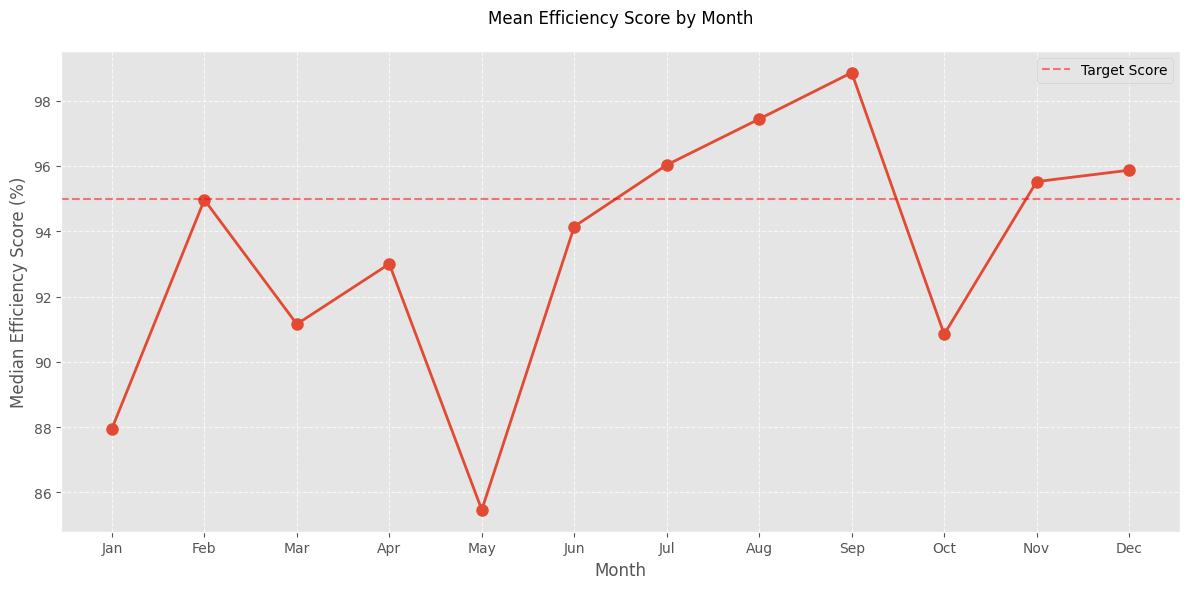

In [21]:
# Calculate median efficiency score by month
monthly_efficiency = df.groupby('Month')['Efficiency_Score'].mean().reset_index()

# Create the run chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_efficiency['Month'], monthly_efficiency['Efficiency_Score'], 
         marker='o', linestyle='-', linewidth=2, markersize=8)

# Customize the plot
plt.title('Mean Efficiency Score by Month', fontsize=12, pad=20)
plt.xlabel('Month')
plt.ylabel('Median Efficiency Score (%)')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show all months
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add reference line at 95%
plt.axhline(y=95, color='r', linestyle='--', alpha=0.5, label='Target Score')

plt.legend()
plt.tight_layout()
plt.show()

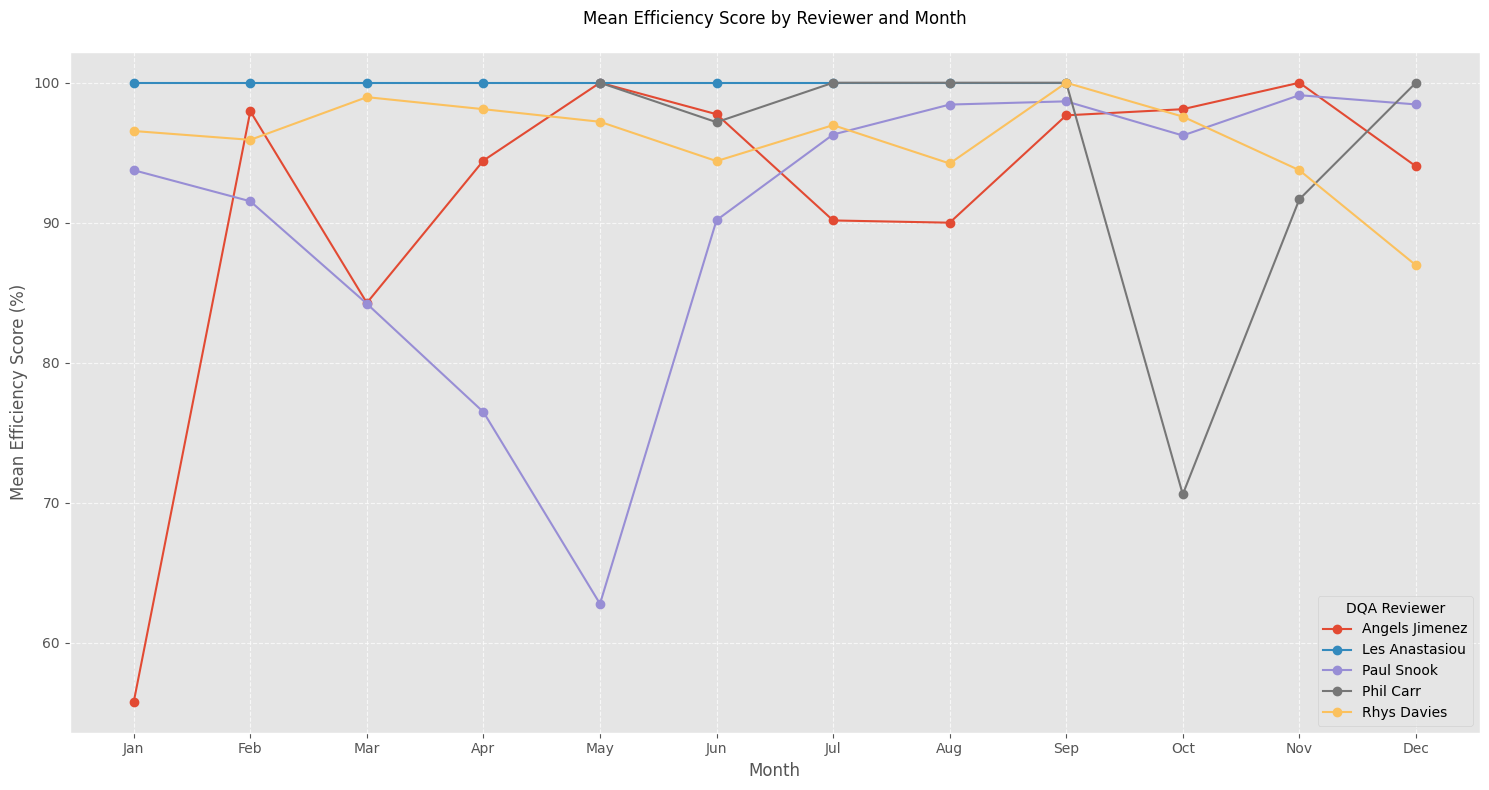

In [22]:
# Calculate mean efficiency score by reviewer and month
monthly_reviewer_efficiency = df.pivot_table(
    values='Efficiency_Score',
    index='DQA Reviewer',
    columns='Month',
    aggfunc='mean'
).round(2)

# Create the plot
plt.figure(figsize=(15, 8))

# Plot line for each reviewer
for reviewer in monthly_reviewer_efficiency.index:
    plt.plot(monthly_reviewer_efficiency.columns, 
             monthly_reviewer_efficiency.loc[reviewer], 
             marker='o',
             label=reviewer)

# Customize the plot
plt.title('Mean Efficiency Score by Reviewer and Month', fontsize=12, pad=20)
plt.xlabel('Month')
plt.ylabel('Mean Efficiency Score (%)')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show all months
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='DQA Reviewer')
plt.tight_layout()
plt.show()

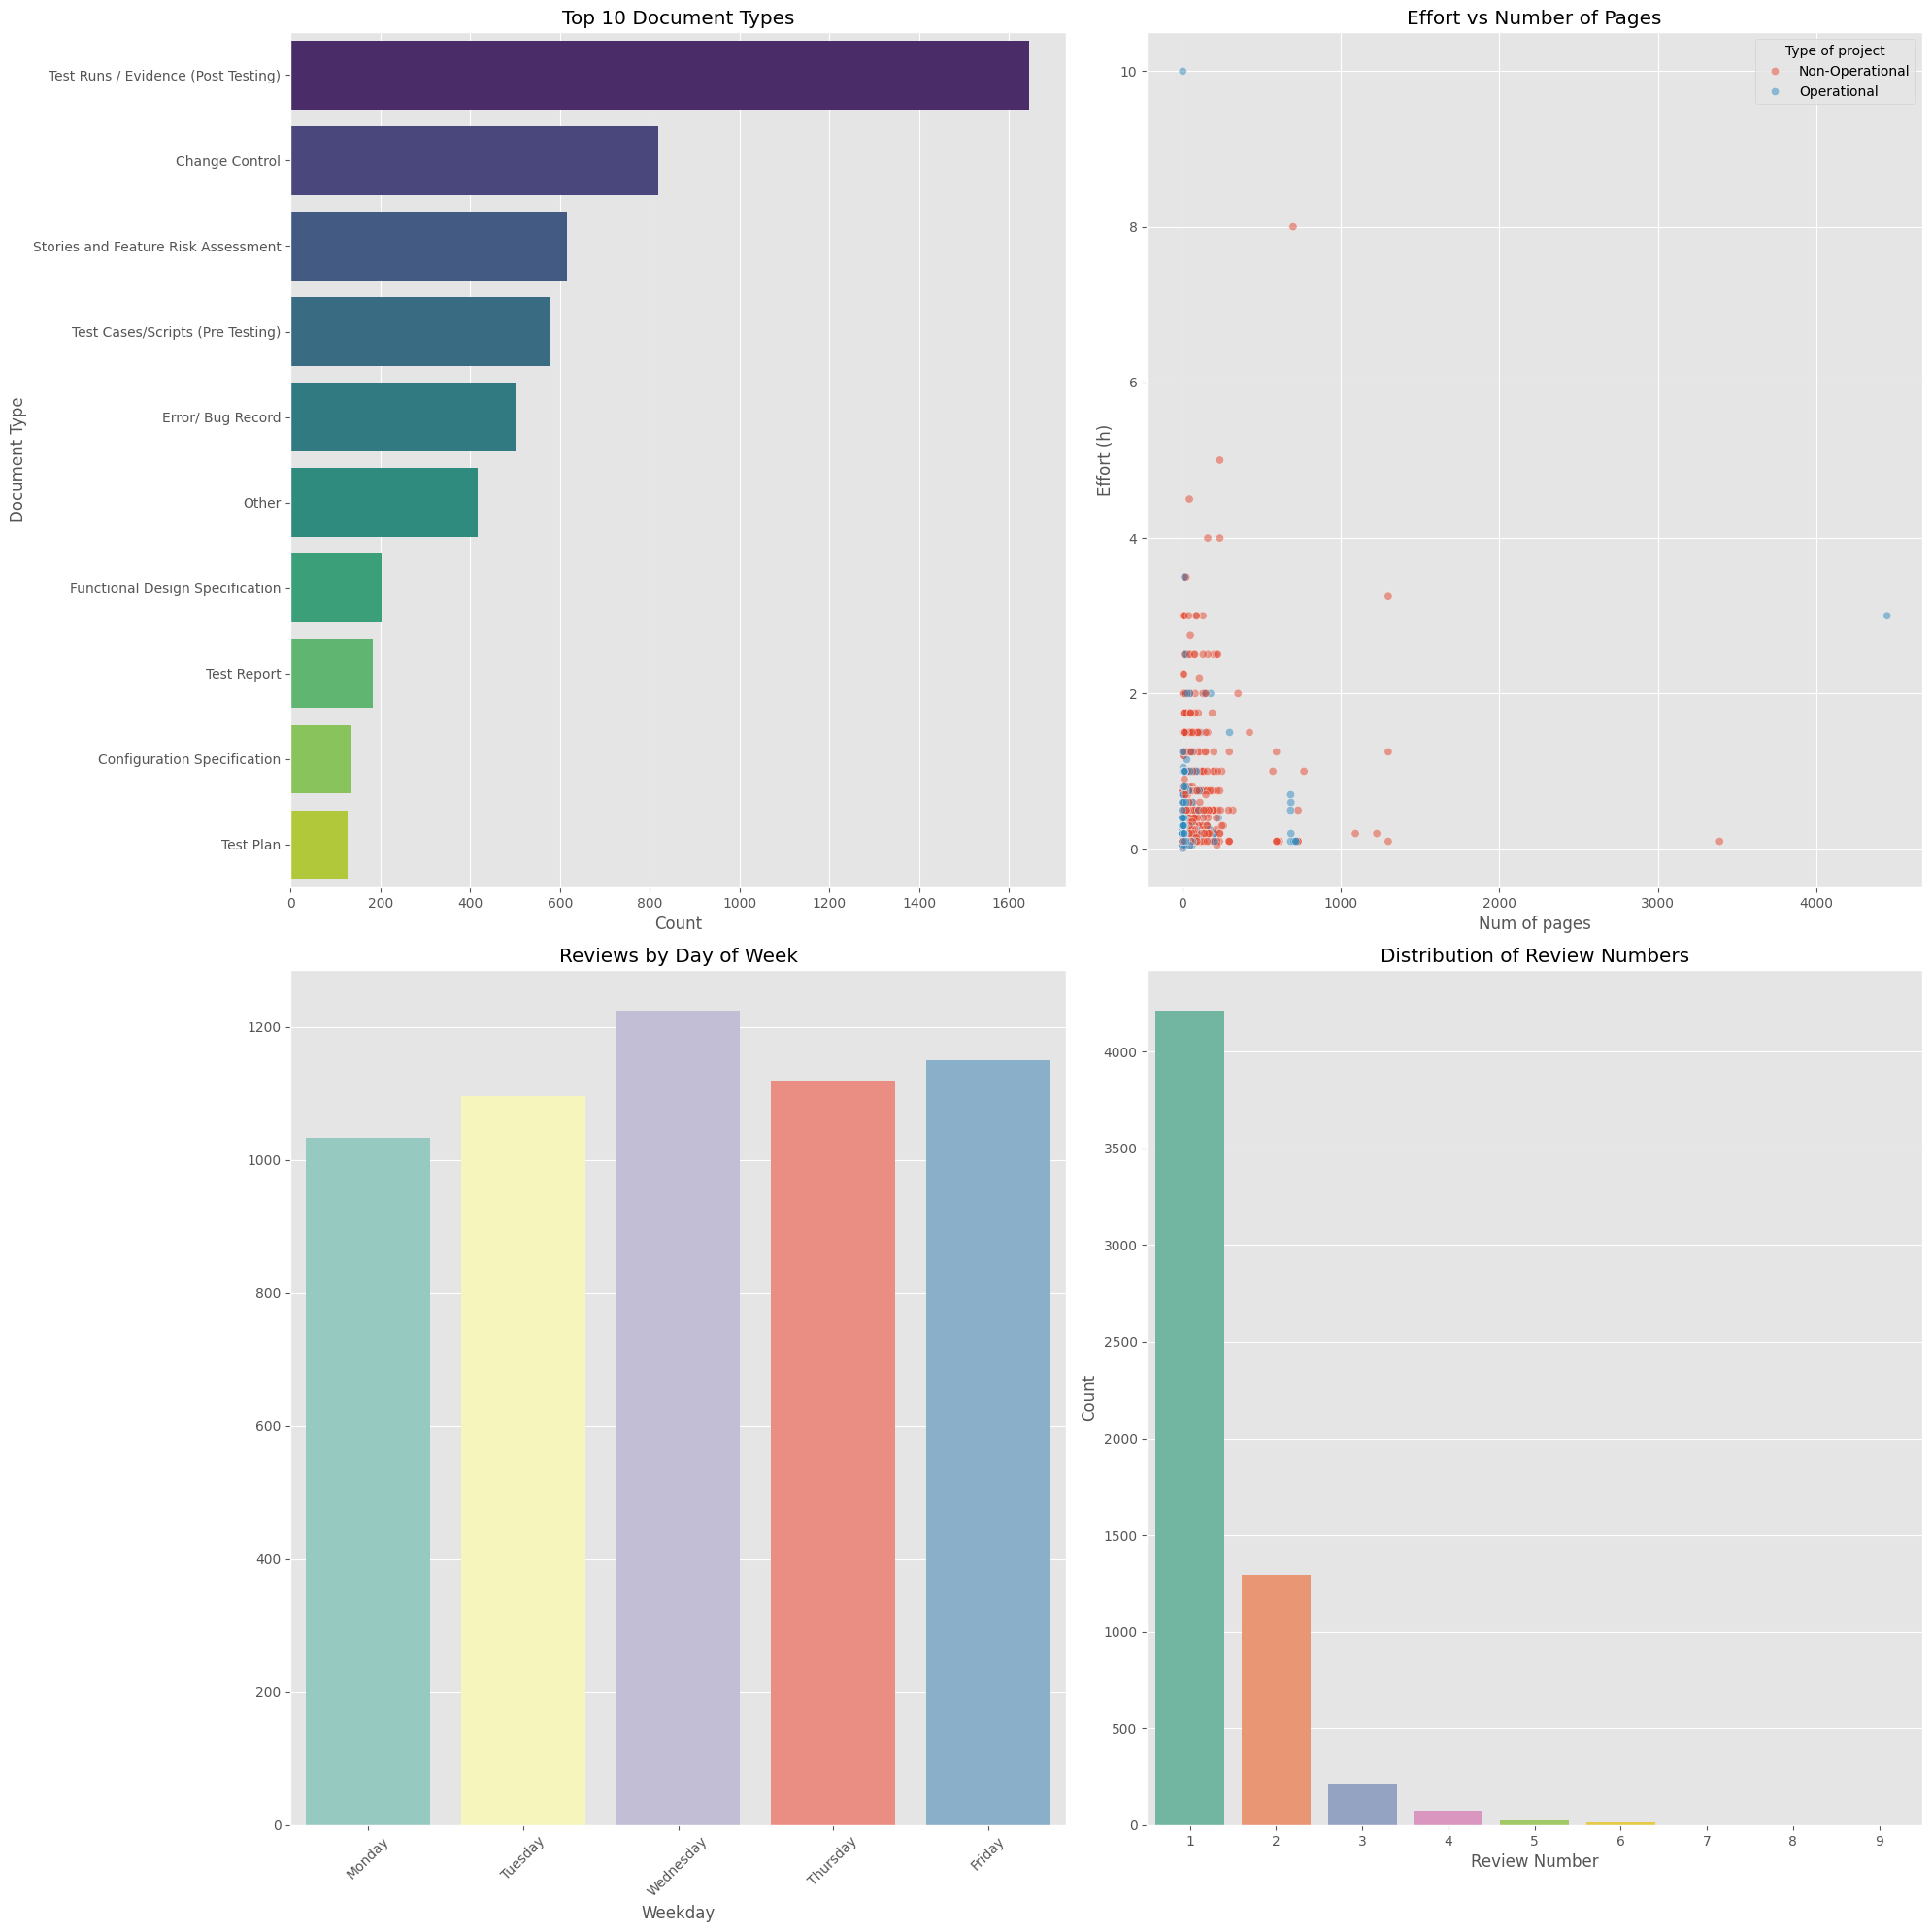

In [23]:
# Create multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# 1. Document Type Distribution
doc_type_counts = df['Document Type'].value_counts().head(10)
sns.barplot(x=doc_type_counts.values, y=doc_type_counts.index, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Top 10 Document Types')
axes[0,0].set_xlabel('Count')

# 2. Effort vs Pages Scatter Plot with Project Type
sns.scatterplot(data=df, x='Num of pages', y='Effort (h)', 
                hue='Type of project', alpha=0.5, ax=axes[0,1])
axes[0,1].set_title('Effort vs Number of Pages')

# 3. Daily Review Volume Distribution
df['Weekday'] = df['Date Received'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
daily_reviews = df['Weekday'].value_counts().reindex(weekday_order)
sns.barplot(x=daily_reviews.index, y=daily_reviews.values, ax=axes[1,0], palette='Set3')
axes[1,0].set_title('Reviews by Day of Week')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Review Number Distribution
review_counts = df['Review number'].value_counts().sort_index()
sns.barplot(x=review_counts.index, y=review_counts.values, ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Distribution of Review Numbers')
axes[1,1].set_xlabel('Review Number')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

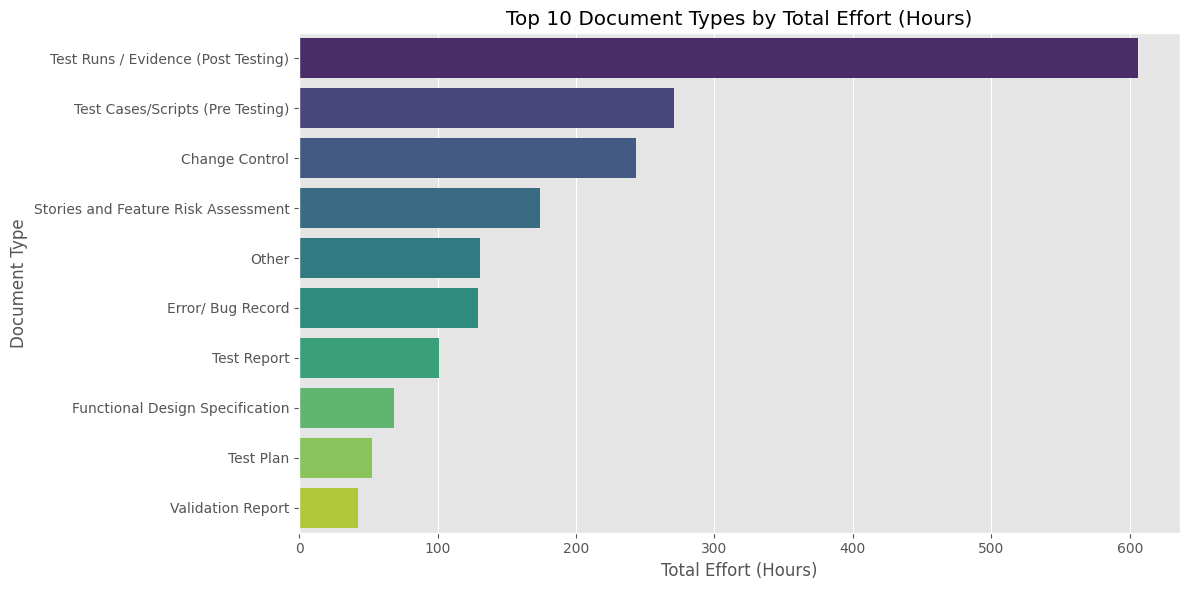

In [24]:
# Calculate total effort by document type and get top 10
doc_effort = df.groupby('Document Type')['Effort (h)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=doc_effort.values, y=doc_effort.index, palette='viridis')
plt.title('Top 10 Document Types by Total Effort (Hours)')
plt.xlabel('Total Effort (Hours)') 
plt.ylabel('Document Type')
plt.tight_layout()
plt.show()

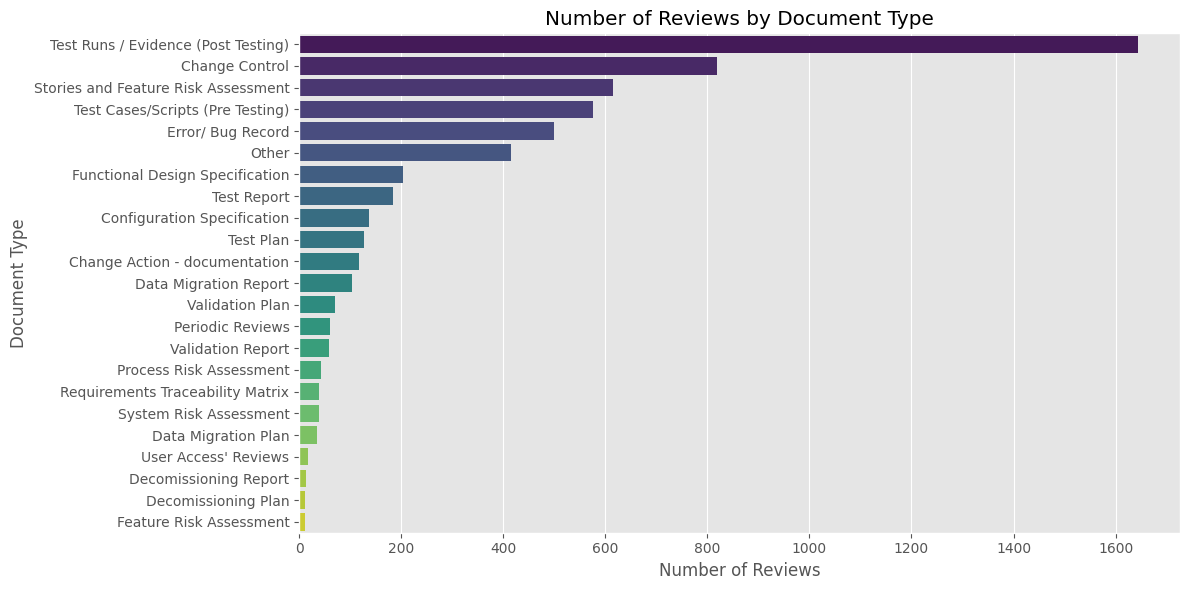

In [25]:
# Create a bar plot of reviews by document type
plt.figure(figsize=(12, 6))

# Count reviews by document type and sort in descending order
doc_type_reviews = df['Document Type'].value_counts()

# Create bar plot using seaborn
sns.barplot(x=doc_type_reviews.values, y=doc_type_reviews.index, palette='viridis')

plt.title('Number of Reviews by Document Type')
plt.xlabel('Number of Reviews')
plt.ylabel('Document Type')

plt.tight_layout()
plt.show()

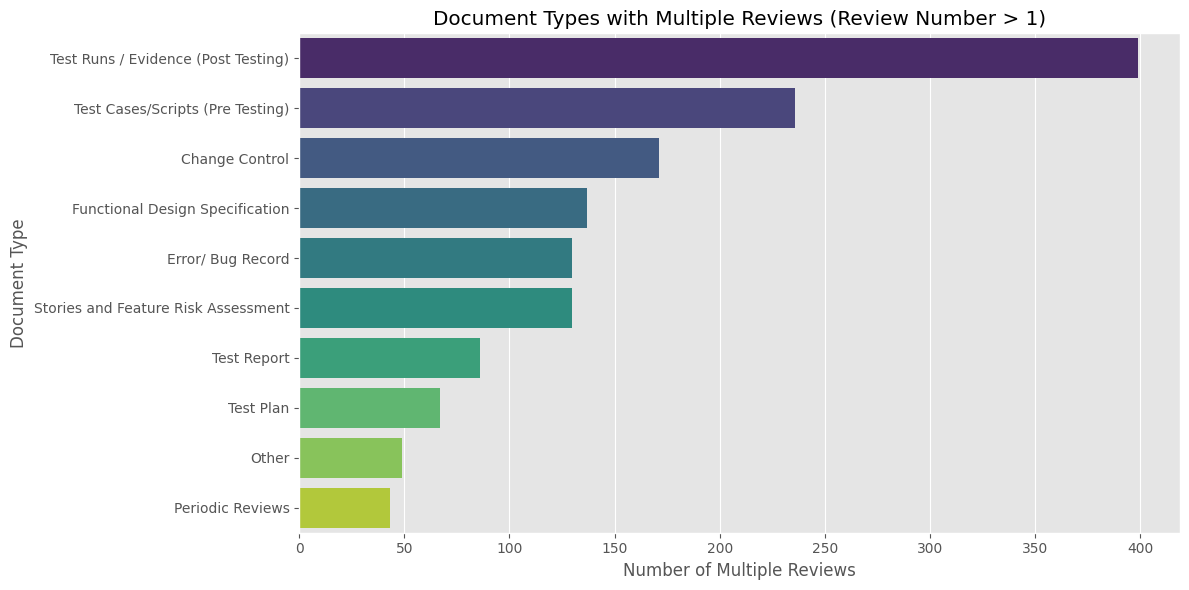

In [26]:
# Filter for reviews with review number > 1 and count by document type
multiple_reviews_by_doc = df[df['Review number'] > 1]['Document Type'].value_counts()

# Display top 10 document types with multiple reviews
plt.figure(figsize=(12, 6))
sns.barplot(x=multiple_reviews_by_doc.head(10).values, y=multiple_reviews_by_doc.head(10).index, palette='viridis')
plt.title('Document Types with Multiple Reviews (Review Number > 1)')
plt.xlabel('Number of Multiple Reviews')
plt.ylabel('Document Type')
plt.tight_layout()
plt.show()

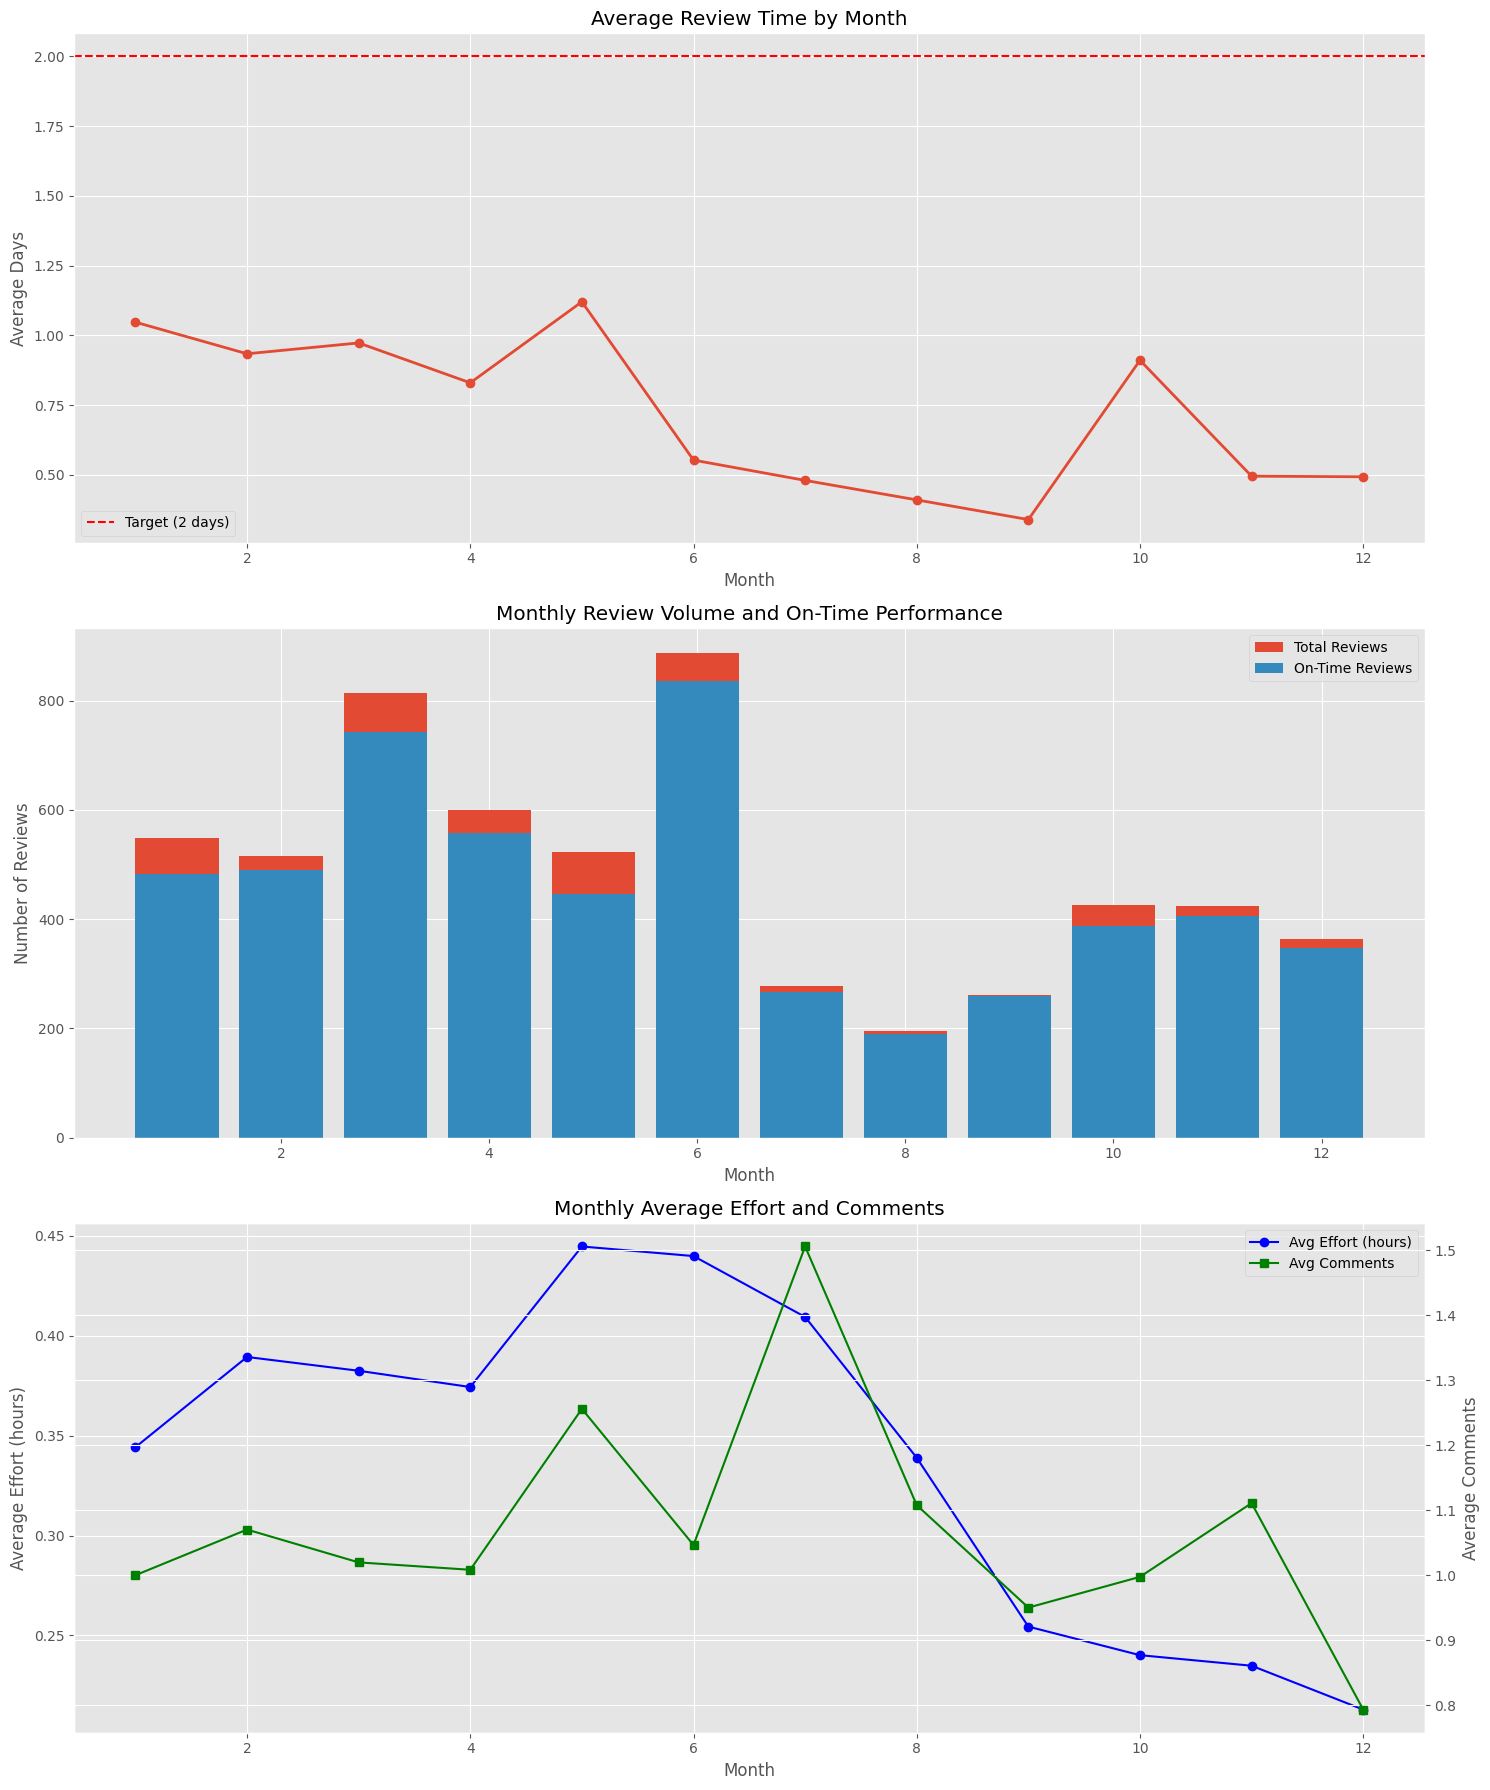

In [27]:
# Create a figure with multiple subplots for different KPIs
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# 1. Monthly Average Review Time
monthly_review_time = df.groupby('Month')['Days'].mean()
axes[0].plot(monthly_review_time.index, monthly_review_time.values, marker='o', linewidth=2)
axes[0].set_title('Average Review Time by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Days')
axes[0].axhline(y=2, color='r', linestyle='--', label='Target (2 days)')
axes[0].legend()
axes[0].grid(True)

# 2. Monthly Review Volume and On-Time Percentage
monthly_volume = df.groupby('Month').size()
monthly_ontime = df[df['Days'] <= 2].groupby('Month').size()
ax2 = axes[1]
ax2.bar(monthly_volume.index, monthly_volume.values, label='Total Reviews')
ax2.bar(monthly_ontime.index, monthly_ontime.values, label='On-Time Reviews')
ax2.set_title('Monthly Review Volume and On-Time Performance')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Reviews')
ax2.legend()
ax2.grid(True)

# 3. Monthly Average Effort and Comments
monthly_effort = df.groupby('Month')['Effort (h)'].mean()
monthly_comments = df.groupby('Month')['Number of comments'].mean()
ax3 = axes[2]
line1 = ax3.plot(monthly_effort.index, monthly_effort.values, marker='o', color='blue', label='Avg Effort (hours)')
ax3_twin = ax3.twinx()
line2 = ax3_twin.plot(monthly_comments.index, monthly_comments.values, marker='s', color='green', label='Avg Comments')
ax3.set_title('Monthly Average Effort and Comments')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Effort (hours)')
ax3_twin.set_ylabel('Average Comments')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax3.legend(lines, labels)
ax3.grid(True)

plt.tight_layout()
plt.show()

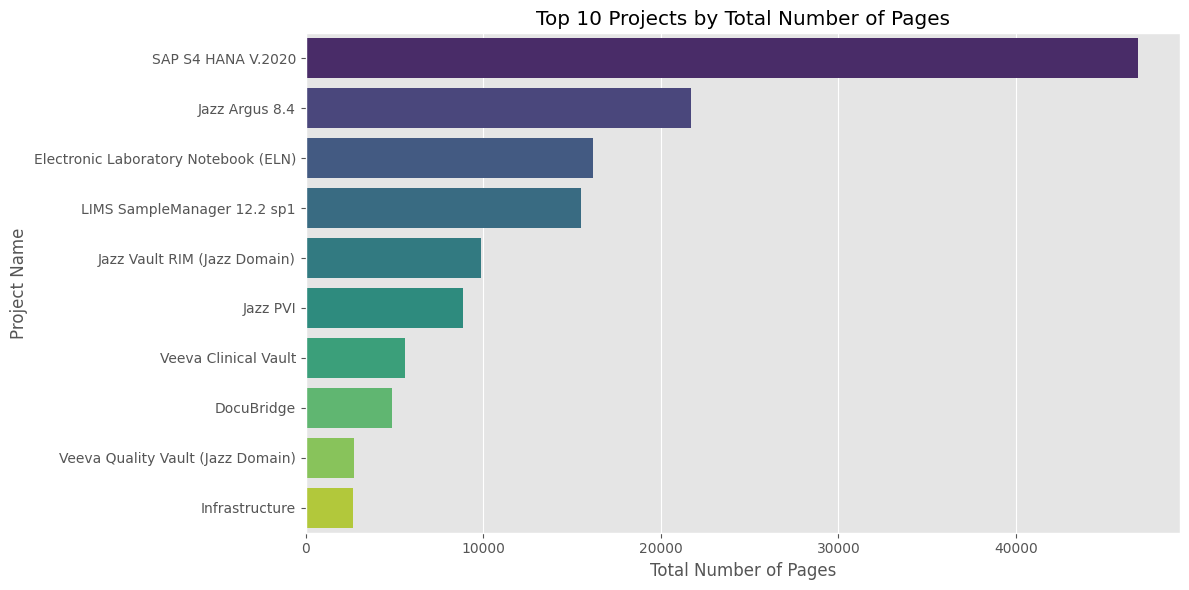

In [28]:
# Group by Project Name and calculate total number of pages
project_pages = df.groupby('Project Name')['Num of pages'].sum().sort_values(ascending=False).head(10)

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=project_pages.values, y=project_pages.index, palette='viridis')
plt.title('Top 10 Projects by Total Number of Pages')
plt.xlabel('Total Number of Pages')
plt.ylabel('Project Name')
plt.tight_layout()
plt.show()

C:\Users\dharris\AppData\Local\Temp\ipykernel_7940\3951008886.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)


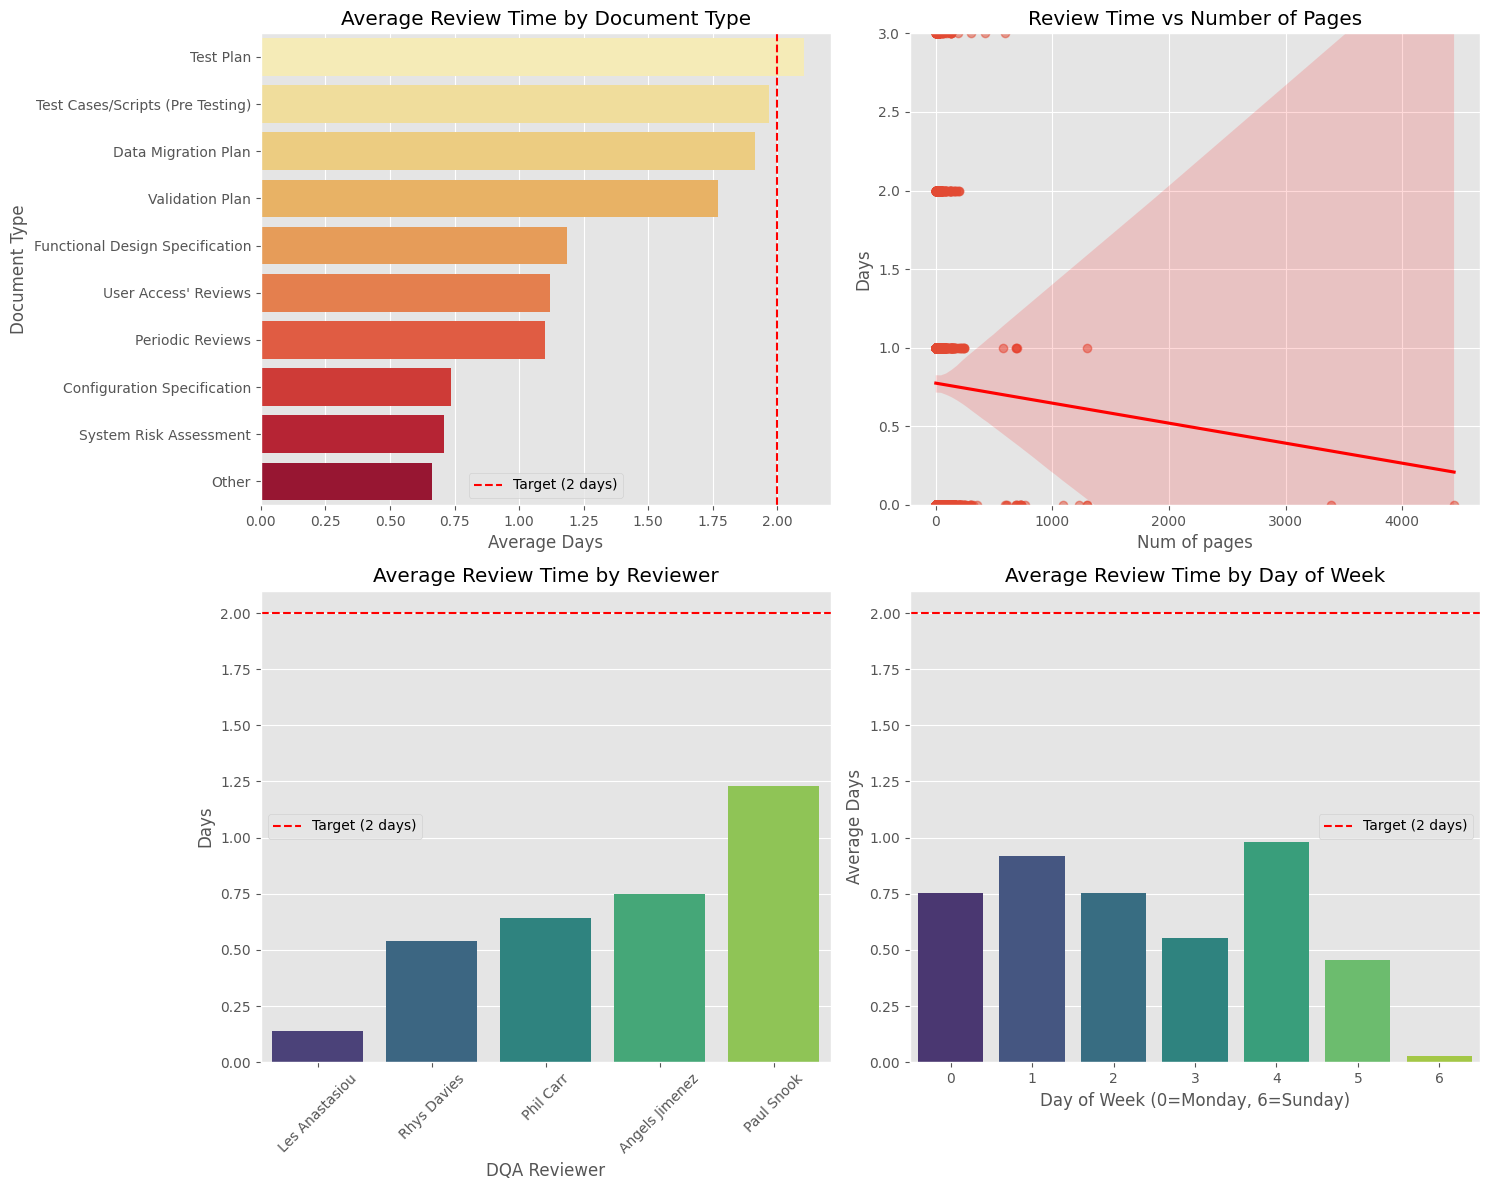


Key Insights for Improving Review Time:
--------------------------------------------------
1. Most time-consuming document types: Test Plan, Test Cases/Scripts (Pre Testing), Data Migration Plan
2. Best performing reviewer: Les Anastasiou (0.14 days)
3. Most efficient day of week: Day 6 (0.03 days)


In [29]:
# Create analysis dashboard for review time improvement insights
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Review Time vs Document Type (Top 10)
avg_review_time_by_doc = df.groupby('Document Type')['Days'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_review_time_by_doc.values, y=avg_review_time_by_doc.index, ax=axes[0,0], palette='YlOrRd')
axes[0,0].set_title('Average Review Time by Document Type')
axes[0,0].set_xlabel('Average Days')
axes[0,0].axvline(x=2, color='red', linestyle='--', label='Target (2 days)')
axes[0,0].legend()

# 2. Review Time vs Number of Pages (with regression line)
sns.regplot(data=df, x='Num of pages', y='Days', ax=axes[0,1], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
axes[0,1].set_title('Review Time vs Number of Pages')
axes[0,1].set_ylim(0, df['Days'].quantile(0.95))  # Limit y-axis to 95th percentile for better visualization

# 3. Reviewer Performance Comparison
reviewer_metrics = df.groupby('DQA Reviewer').agg({
    'Days': 'mean',
    'Efficiency_Score': 'mean',
    'Project Name': 'count'
}).round(2)
reviewer_metrics = reviewer_metrics.sort_values('Days', ascending=True)

sns.barplot(x=reviewer_metrics.index, y=reviewer_metrics['Days'], ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Average Review Time by Reviewer')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
axes[1,0].axhline(y=2, color='red', linestyle='--', label='Target (2 days)')
axes[1,0].legend()

# 4. Time of Week Analysis
weekday_avg = df.groupby('Day_of_Week')['Days'].mean()
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Average Review Time by Day of Week')
axes[1,1].set_xlabel('Day of Week (0=Monday, 6=Sunday)')
axes[1,1].set_ylabel('Average Days')
axes[1,1].axhline(y=2, color='red', linestyle='--', label='Target (2 days)')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Print key findings
print("\nKey Insights for Improving Review Time:")
print("-" * 50)
print(f"1. Most time-consuming document types: {', '.join(avg_review_time_by_doc.head(3).index)}")
print(f"2. Best performing reviewer: {reviewer_metrics.index[0]} ({reviewer_metrics['Days'].iloc[0]:.2f} days)")
print(f"3. Most efficient day of week: Day {weekday_avg.idxmin()} ({weekday_avg.min():.2f} days)")

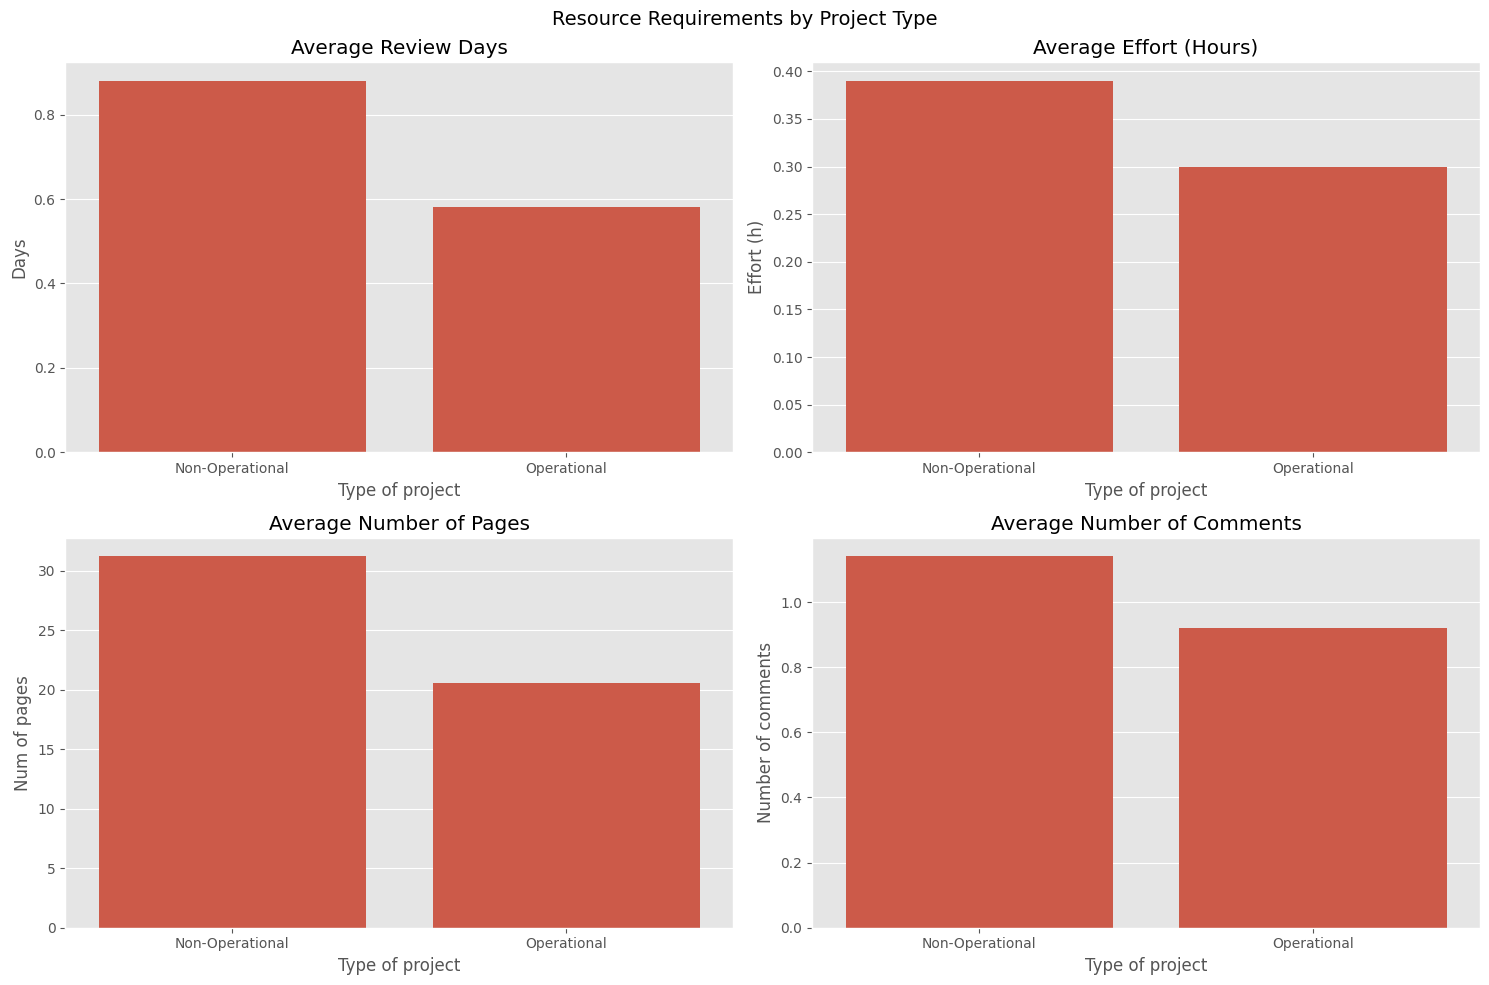


Detailed Analysis by Project Type:
                 Days  Effort (h)  Num of pages  Number of comments  \
Type of project                                                       
Non-Operational  0.88        0.39         31.22                1.14   
Operational      0.58        0.30         20.58                0.92   

                 Project Name  
Type of project                
Non-Operational          3720  
Operational              2116  


In [30]:
# Analyze key metrics by project type
project_type_analysis = df.groupby('Type of project').agg({
    'Days': 'mean',
    'Effort (h)': 'mean',
    'Num of pages': 'mean',
    'Number of comments': 'mean',
    'Project Name': 'count'
}).round(2)

# Create a comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Resource Requirements by Project Type', fontsize=14)

# Average Days
sns.barplot(x=project_type_analysis.index, y=project_type_analysis['Days'], ax=axes[0,0])
axes[0,0].set_title('Average Review Days')

# Average Effort
sns.barplot(x=project_type_analysis.index, y=project_type_analysis['Effort (h)'], ax=axes[0,1])
axes[0,1].set_title('Average Effort (Hours)')

# Average Pages
sns.barplot(x=project_type_analysis.index, y=project_type_analysis['Num of pages'], ax=axes[1,0])
axes[1,0].set_title('Average Number of Pages')

# Average Comments
sns.barplot(x=project_type_analysis.index, y=project_type_analysis['Number of comments'], ax=axes[1,1])
axes[1,1].set_title('Average Number of Comments')

plt.tight_layout()
plt.show()

# Print the analysis
print("\nDetailed Analysis by Project Type:")
print(project_type_analysis)

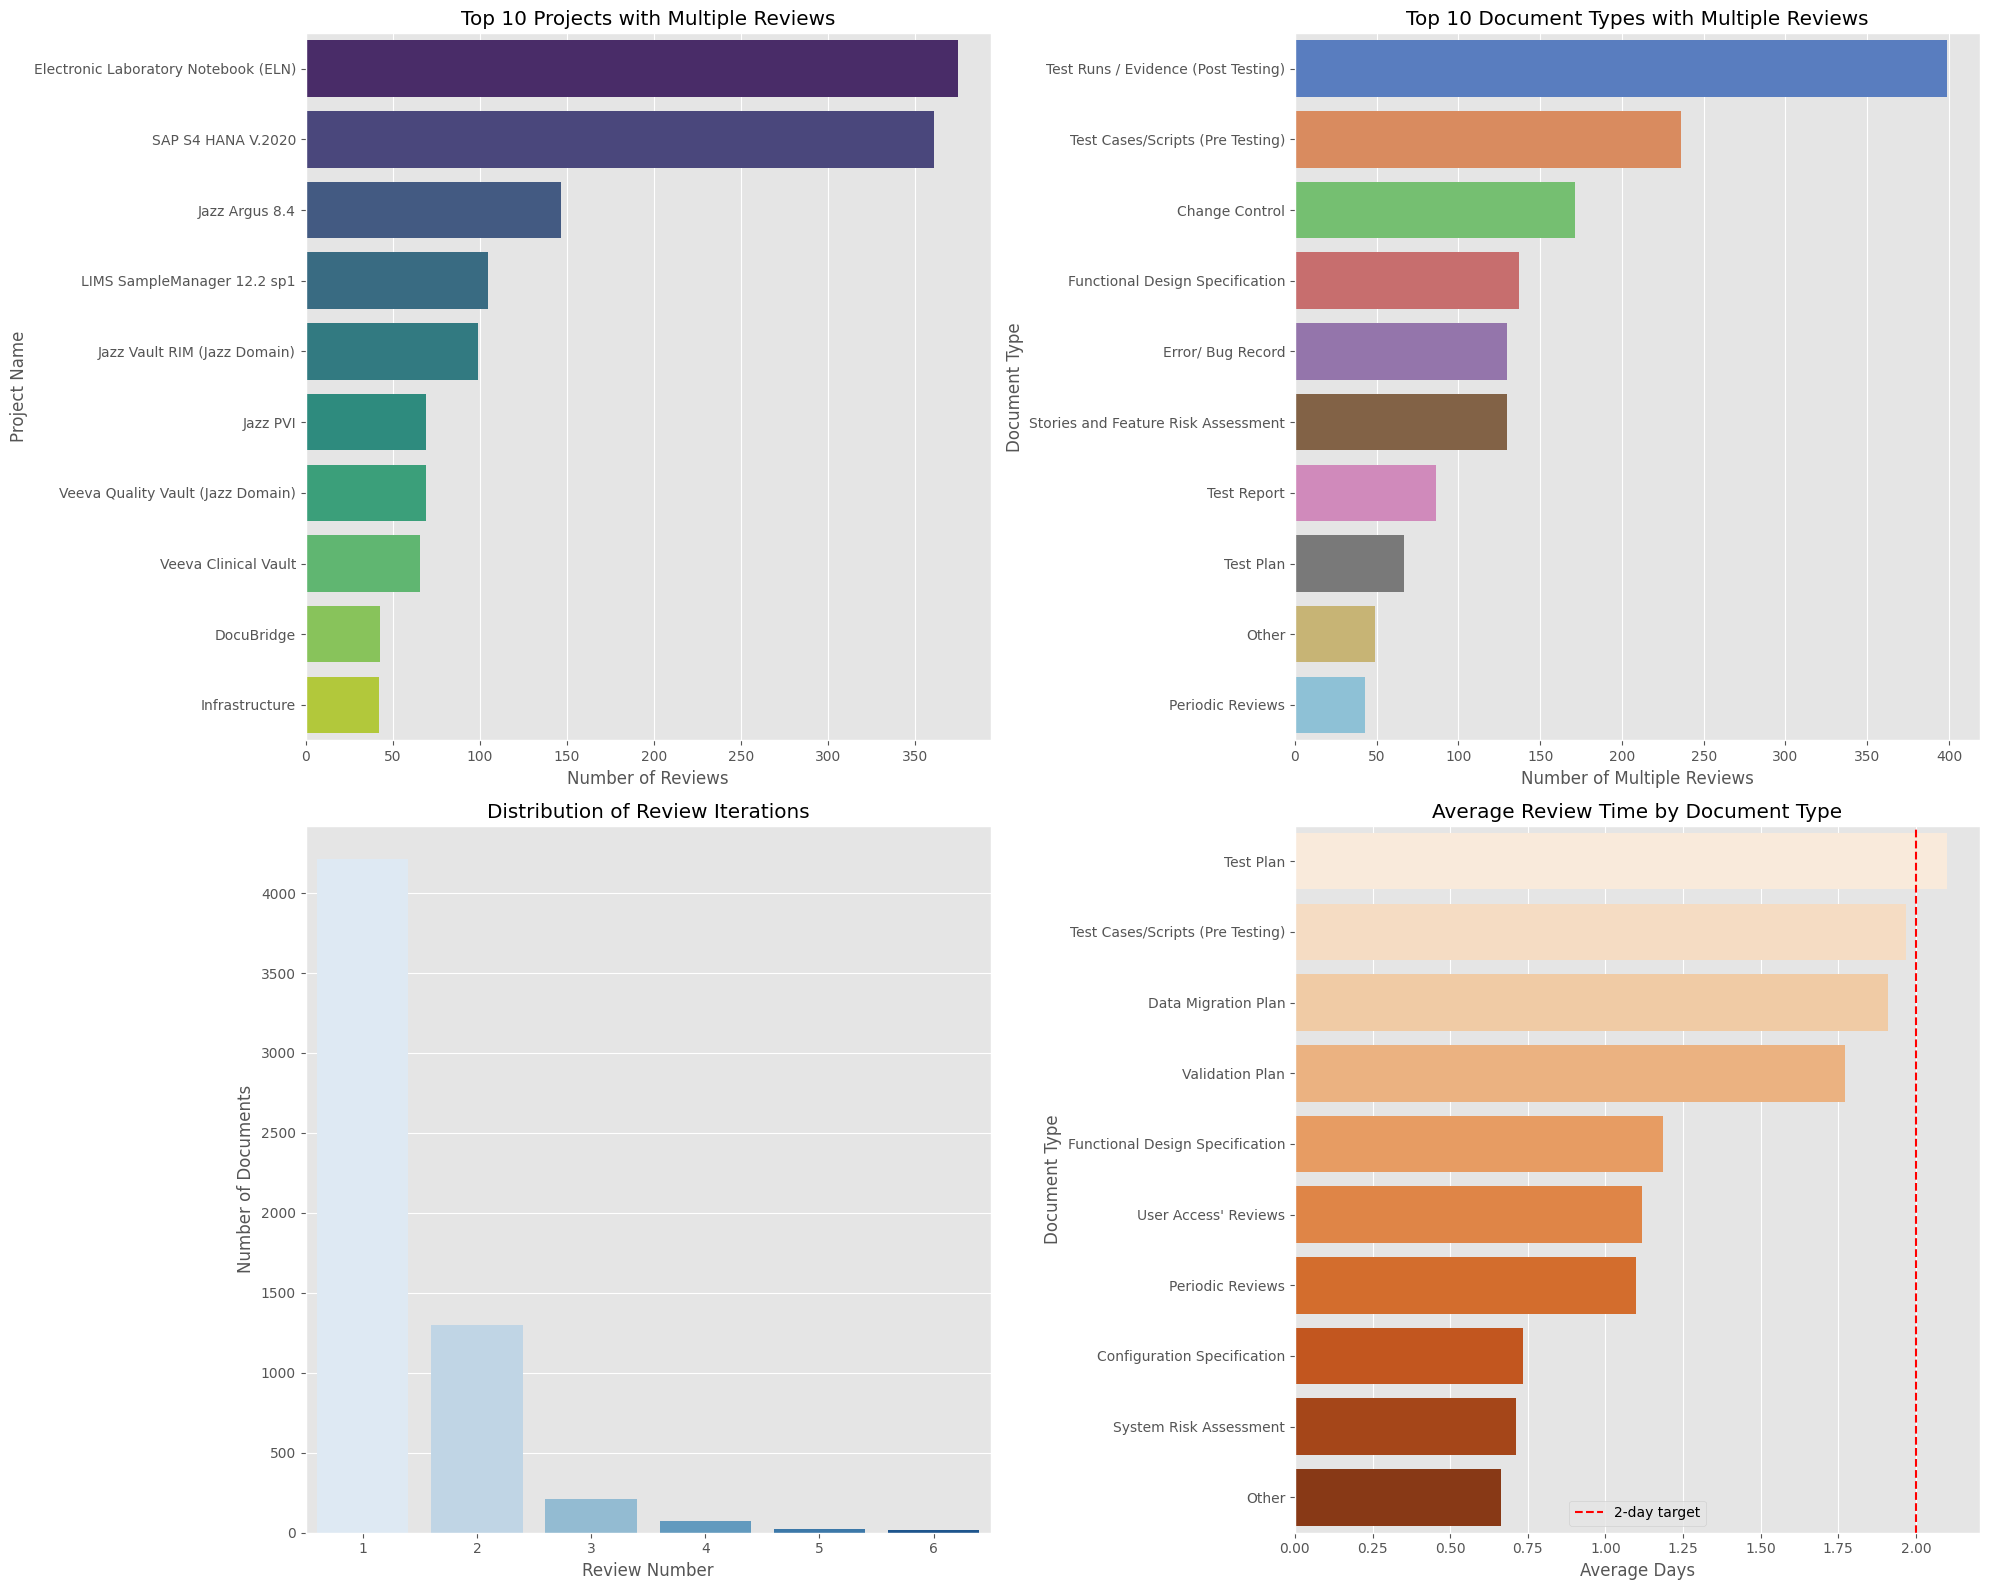

In [31]:

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Multiple Reviews by Project (Top 10)
top_projects = multiple_reviews.head(10)
sns.barplot(x=top_projects.values, y=top_projects.index, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Top 10 Projects with Multiple Reviews')
axes[0,0].set_xlabel('Number of Reviews')

# 2. Document Types Requiring Multiple Reviews (Top 10)
top_doc_types = multiple_reviews_by_doc.head(10)
sns.barplot(x=top_doc_types.values, y=top_doc_types.index, ax=axes[0,1], palette='muted')
axes[0,1].set_title('Top 10 Document Types with Multiple Reviews')
axes[0,1].set_xlabel('Number of Multiple Reviews')

# 3. Distribution of Review Iterations
review_counts_plot = review_counts.head(6)  # Show up to 6th review
sns.barplot(x=review_counts_plot.index, y=review_counts_plot.values, ax=axes[1,0], palette='Blues')
axes[1,0].set_title('Distribution of Review Iterations')
axes[1,0].set_xlabel('Review Number')
axes[1,0].set_ylabel('Number of Documents')

# 4. Review Time Distribution by Document Type (Top 10)
avg_review_time_by_doc = df.groupby('Document Type')['Days'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_review_time_by_doc.values, y=avg_review_time_by_doc.index, ax=axes[1,1], palette='Oranges')
axes[1,1].set_title('Average Review Time by Document Type')
axes[1,1].set_xlabel('Average Days')
axes[1,1].axvline(x=2, color='red', linestyle='--', label='2-day target')
axes[1,1].legend()

plt.tight_layout()
plt.show()


# Documents/Projects Requiring Multiple Reviews

## Top 10 Projects with Multiple Reviews
1. Electronic Laboratory Notebook (ELN): 375 reviews
2. SAP S4 HANA V.2020: 361 reviews
3. Jazz Argus 8.4: 147 reviews 
4. LIMS SampleManager 12.2 sp1: 105 reviews
5. Jazz Vault RIM (Jazz Domain): 99 reviews
6. Jazz PVI: 69 reviews
7. Veeva Quality Vault (Jazz Domain): 69 reviews
8. Veeva Clinical Vault: 66 reviews
9. DocuBridge: 43 reviews
10. Infrastructure: 42 reviews

## Document Types Most Frequently Requiring Multiple Reviews
1. Test Runs / Evidence (Post Testing): 399 instances
2. Test Cases/Scripts (Pre Testing): 236 instances
3. Change Control: 171 instances
4. Functional Design Specification: 137 instances
5. Error/Bug Record: 130 instances

## Distribution of Review Iterations
- First Review: 4,210 documents
- Second Review: 1,296 documents
- Third Review: 212 documents
- Fourth Review: 74 documents
- Fifth or More Review: 44 documents

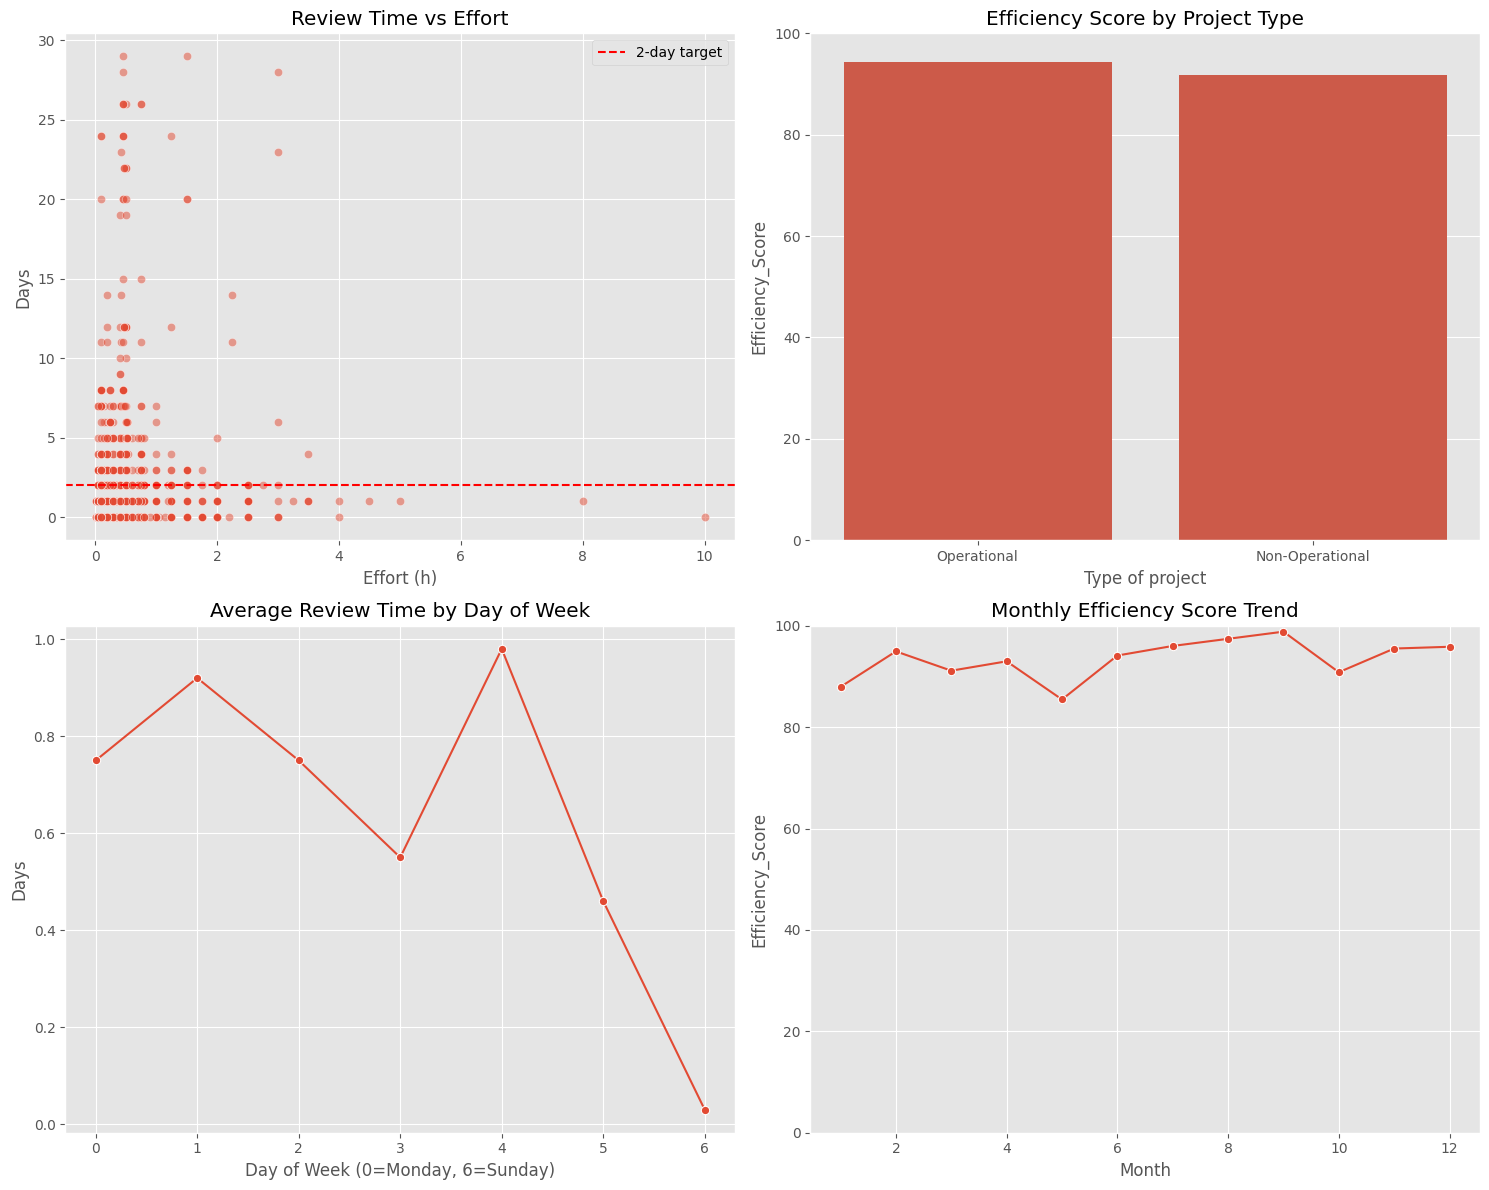

In [32]:
# Create a comprehensive trend analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Effort vs Review Time Correlation
sns.scatterplot(data=df, x='Effort (h)', y='Days', ax=axes[0,0], alpha=0.5)
axes[0,0].set_title('Review Time vs Effort')
axes[0,0].axhline(y=2, color='r', linestyle='--', label='2-day target')
axes[0,0].legend()

# 2. Efficiency by Type of Project
project_type_efficiency = df.groupby('Type of project').agg({
    'Efficiency_Score': 'mean',
    'Days': 'mean',
    'Project Name': 'count'
}).sort_values('Efficiency_Score', ascending=False)

sns.barplot(data=project_type_efficiency.reset_index(), 
            x='Type of project', y='Efficiency_Score', ax=axes[0,1])
axes[0,1].set_title('Efficiency Score by Project Type')
axes[0,1].set_ylim(0, 100)

# 3. Weekly Patterns
weekday_metrics = df.groupby('Day_of_Week').agg({
    'Days': 'mean',
    'Effort (h)': 'mean',
    'Project Name': 'count'
}).round(2)

sns.lineplot(data=weekday_metrics, x=weekday_metrics.index, y='Days', ax=axes[1,0], marker='o')
axes[1,0].set_title('Average Review Time by Day of Week')
axes[1,0].set_xlabel('Day of Week (0=Monday, 6=Sunday)')

# 4. Monthly Trend of Review Efficiency
monthly_trend = df.groupby('Month').agg({
    'Efficiency_Score': 'mean',
    'Days': 'mean'
}).round(2)

sns.lineplot(data=monthly_trend, x=monthly_trend.index, y='Efficiency_Score', ax=axes[1,1], marker='o')
axes[1,1].set_title('Monthly Efficiency Score Trend')
axes[1,1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

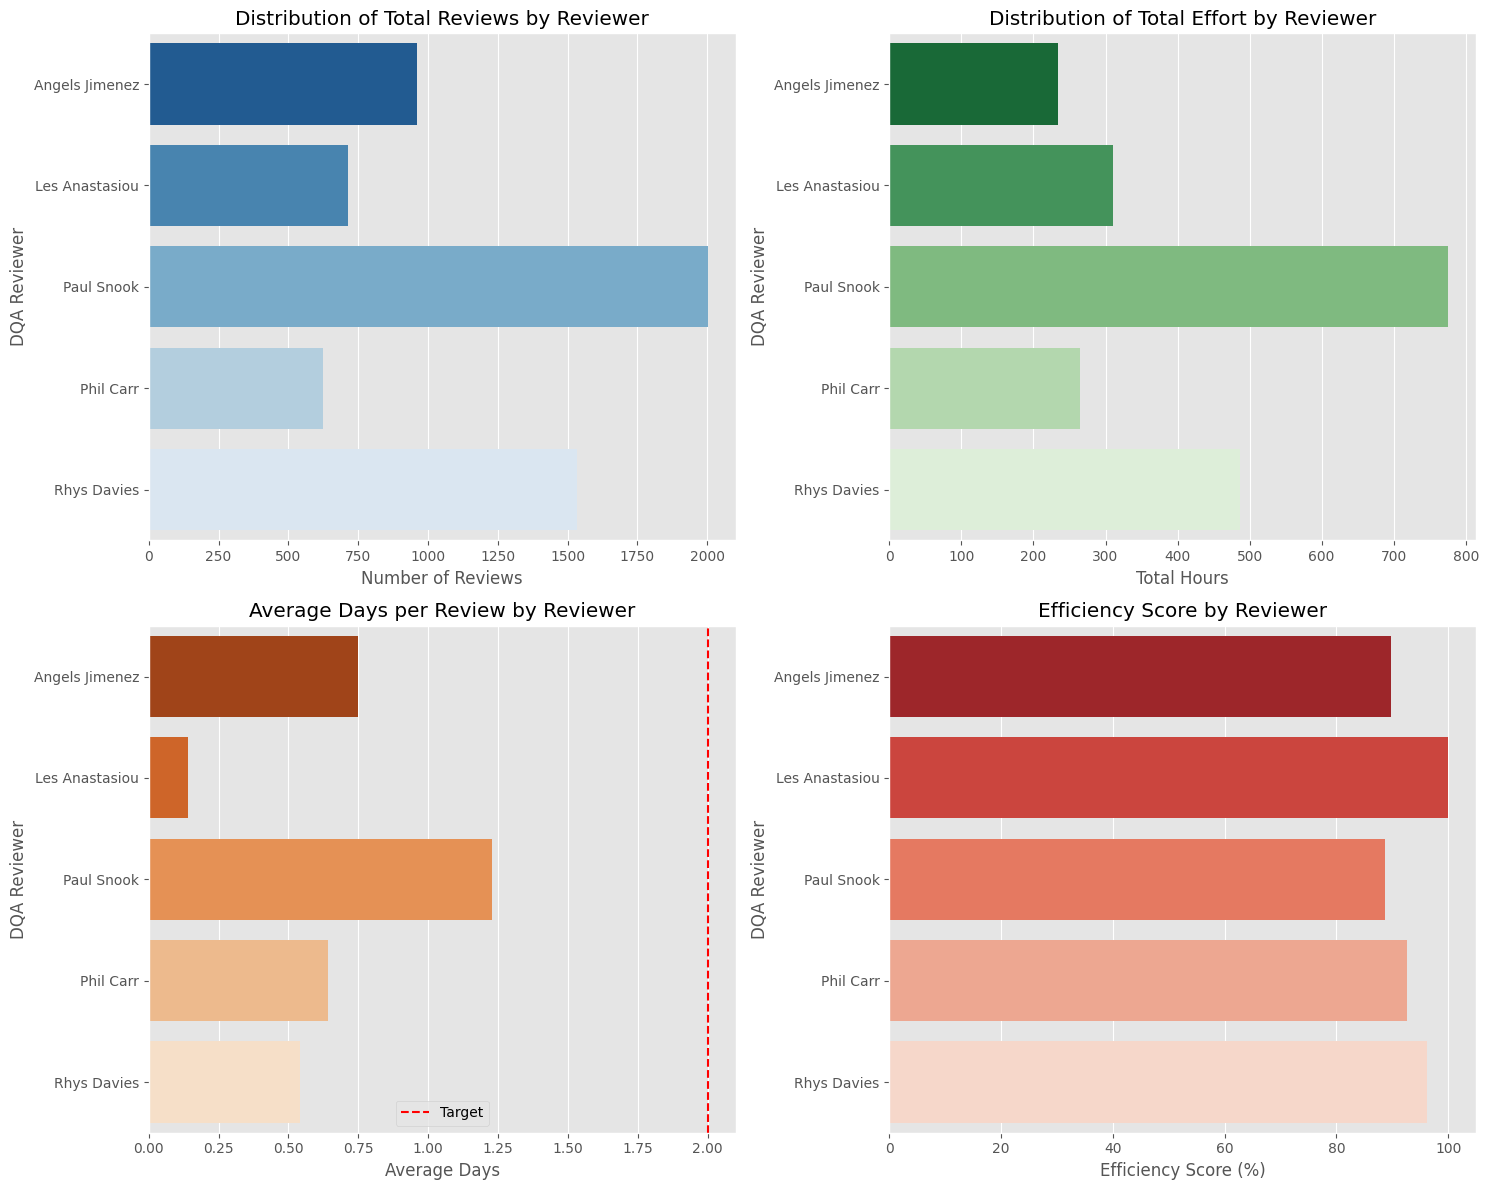

In [33]:
# Create a comprehensive resource distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of Reviews by Reviewer
sns.barplot(data=reviewer_stats, x='Total_Reviews', y='DQA Reviewer', ax=axes[0,0], palette='Blues_r')
axes[0,0].set_title('Distribution of Total Reviews by Reviewer')
axes[0,0].set_xlabel('Number of Reviews')

# 2. Distribution of Effort by Reviewer
sns.barplot(data=reviewer_stats, x='Total_Effort', y='DQA Reviewer', ax=axes[0,1], palette='Greens_r')
axes[0,1].set_title('Distribution of Total Effort by Reviewer')
axes[0,1].set_xlabel('Total Hours')

# 3. Average Days per Review by Reviewer
sns.barplot(data=reviewer_stats, x='Avg_Days', y='DQA Reviewer', ax=axes[1,0], palette='Oranges_r')
axes[1,0].set_title('Average Days per Review by Reviewer')
axes[1,0].set_xlabel('Average Days')
axes[1,0].axvline(x=2, color='red', linestyle='--', label='Target')
axes[1,0].legend()

# 4. Efficiency Score by Reviewer
sns.barplot(data=reviewer_stats, x='Efficiency_Score', y='DQA Reviewer', ax=axes[1,1], palette='Reds_r')
axes[1,1].set_title('Efficiency Score by Reviewer')
axes[1,1].set_xlabel('Efficiency Score (%)')

plt.tight_layout()
plt.show()

In [34]:
# Create a pivot table showing project counts by reviewer and month
reviewer_projects = df.pivot_table(
    index='DQA Reviewer',
    columns='Month',
    values='Project Name',
    aggfunc='count',
    fill_value=0
)

# For each month and reviewer, get top 5 projects 
monthly_top_projects = {}
for month in range(1,13):
    print(f"\nMonth {month} Top Projects by Reviewer:")
    print("-" * 40)
    monthly_data = df[df['Month'] == month]
    
    for reviewer in df['DQA Reviewer'].unique():
        reviewer_data = monthly_data[monthly_data['DQA Reviewer'] == reviewer]
        top_5 = reviewer_data['Project Name'].value_counts().head(5)
        
        if len(top_5) > 0:
            print(f"\n{reviewer}:")
            print(top_5)


Month 1 Top Projects by Reviewer:
----------------------------------------

Paul Snook:
Project Name
SAP S4 HANA V.2020                      244
Electronic Laboratory Notebook (ELN)     10
LIMS SampleManager 12.2 sp1               2
Name: count, dtype: int64

Angels Jimenez:
Project Name
Microsoft Dynamics NAV          30
Veeva CDMS - EDC                14
Veeva Clinical Vault            10
Automation Anywhere Platform     8
Infrastructure                   8
Name: count, dtype: int64

Rhys Davies:
Project Name
Jazz Argus 8.4                 64
Rave EDC                       12
JazzLearn (SABA Cloud VEMS)    10
Rave eCOA                       8
Medidata Platform               6
Name: count, dtype: int64

Les Anastasiou:
Project Name
Web based Epidyolex Dose Calculator (EU/Global)    30
Reliance (eQMS)                                    18
Jazz Vault RIM (Jazz Domain)                       16
Infrastructure                                      6
Veeva Quality Vault (Jazz Domain)       

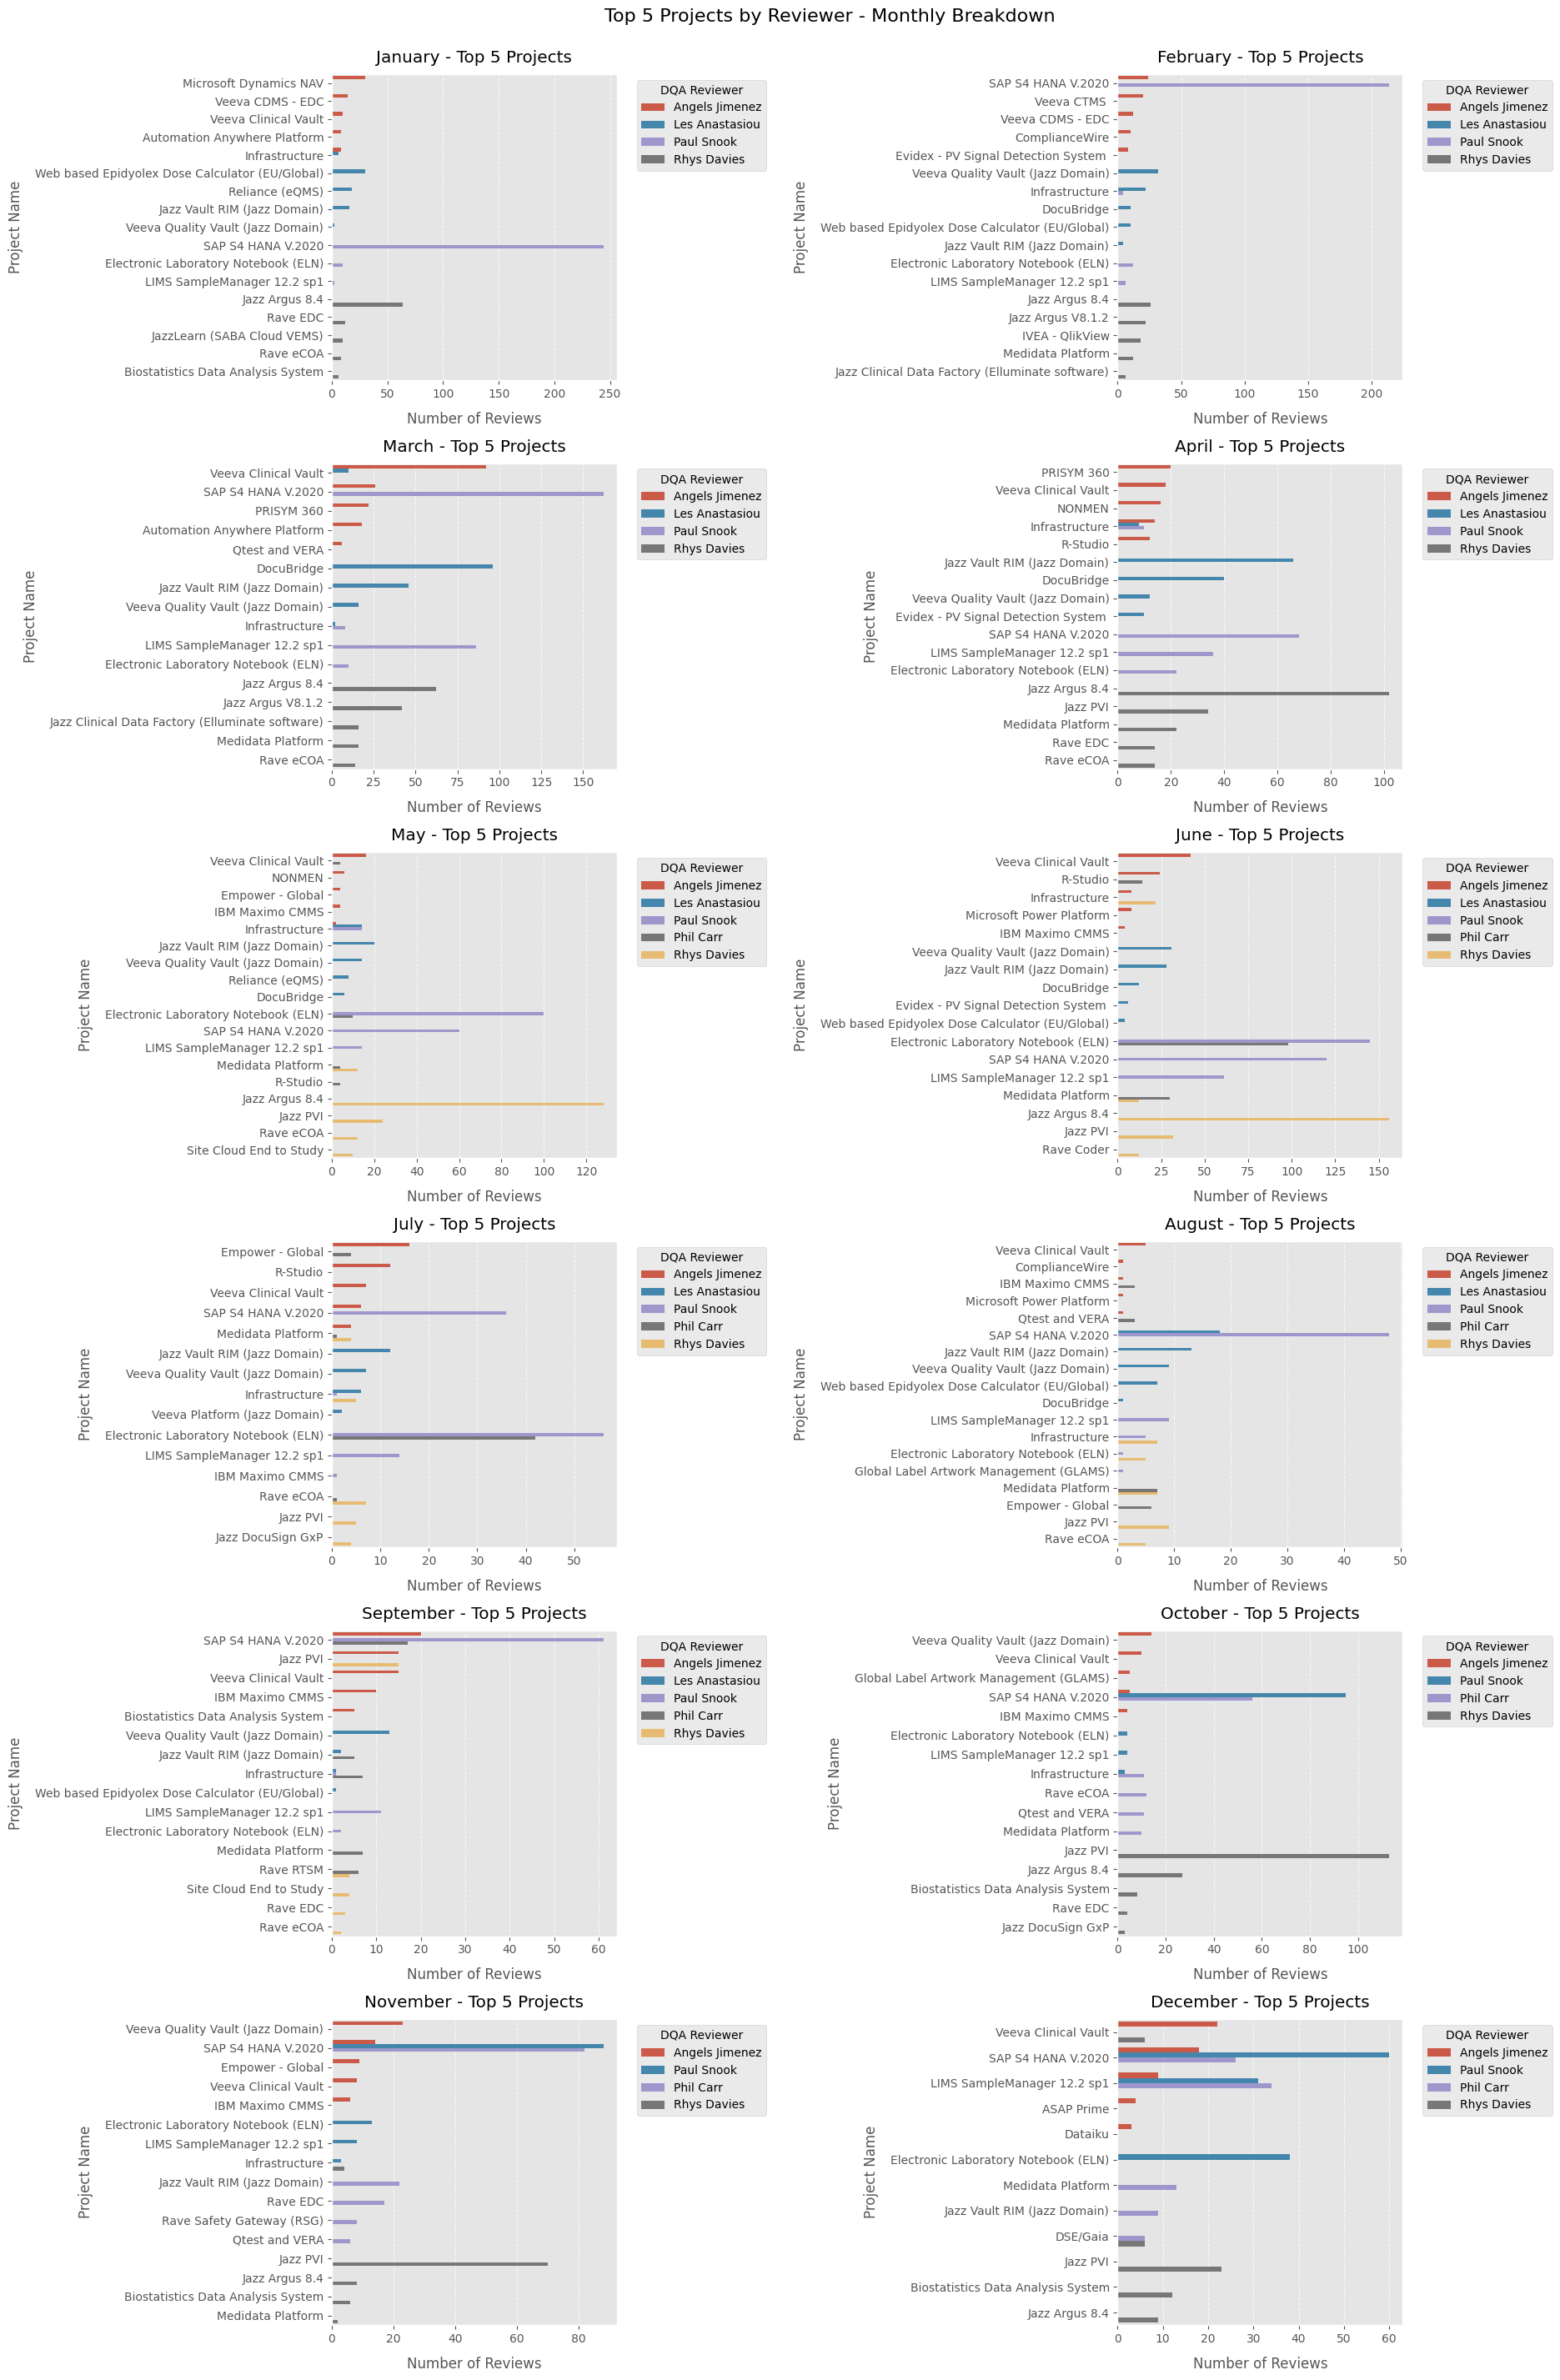

In [38]:
# Create subplots with better spacing and size
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
fig.suptitle('Top 5 Projects by Reviewer - Monthly Breakdown', fontsize=16, y=0.95)

# Process each month
for month in range(1, 13):
    row = (month - 1) // 2
    col = (month - 1) % 2
    
    # Filter data for the month
    monthly_data = df[df['Month'] == month]
    
    # Get top 5 projects for each reviewer
    monthly_projects = monthly_data.groupby(['DQA Reviewer', 'Project Name'])['Project Name'].count()
    monthly_projects = monthly_projects.reset_index(name='Count')
    
    # Sort by reviewer and count, keep top 5 for each reviewer
    top_projects = monthly_projects.sort_values(['DQA Reviewer', 'Count'], ascending=[True, False])
    top_projects = top_projects.groupby('DQA Reviewer').head(5)
    
    # Create subplot for this month
    ax = axes[row, col]
    
    # Plot the data with enhanced styling
    sns.barplot(data=top_projects, x='Count', y='Project Name', hue='DQA Reviewer', ax=ax)
    
    # Customize subplot
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
    ax.set_title(f'{month_names[month-1]} - Top 5 Projects', pad=10)
    ax.set_xlabel('Number of Reviews', labelpad=10)
    ax.set_ylabel('Project Name', labelpad=10)
    
    # Adjust legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='DQA Reviewer')
    
    # Grid lines for better readability
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

In [39]:
import plotly.express as px

# Prepare the data
sunburst_data = df.groupby(['Type of project', 'Document Type', 'Project Name']).size().reset_index(name='count')

# Create the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['Type of project', 'Document Type', 'Project Name'],
    values='count',
    title='Distribution of Reviews Across Projects',
    width=1000,
    height=1000
)

# Update layout
fig.update_layout(
    title_x=0.5,
    title_font_size=20
)

fig.show()

In [43]:
# Create the sunburst chart and save as HTML
fig = px.sunburst(
    sunburst_data,
    path=['Type of project', 'Document Type', 'Project Name'],
    values='count',
    title='Distribution of Reviews Across Projects',
    width=1000,
    height=1000
)

# Update layout
fig.update_layout(
    title_x=0.5,
    title_font_size=20
)

# Save as HTML file
fig.write_html(r"C:\Users\dharris\OneDrive - Jazzpharma.com\Project\Jazz.Python\Six Sigma Data with Python\data\review_distribution_sunburst.html")

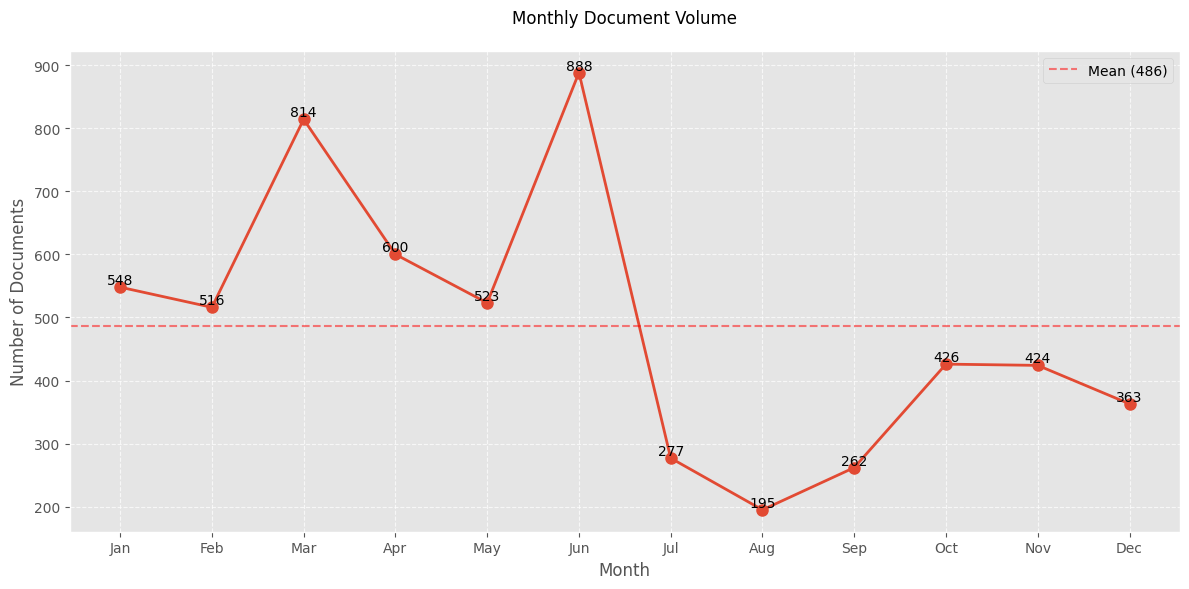

In [44]:
plt.figure(figsize=(12, 6))

# Plot the monthly volume
plt.plot(monthly_volume.index, monthly_volume.values, 
         marker='o', linestyle='-', linewidth=2, markersize=8)

# Customize the plot
plt.title('Monthly Document Volume', fontsize=12, pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Documents')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks to show all months
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add data labels
for i, v in enumerate(monthly_volume.values):
    plt.text(i+1, v, str(v), ha='center', va='bottom')

# Calculate and display the mean line
mean_volume = monthly_volume.mean()
plt.axhline(y=mean_volume, color='r', linestyle='--', alpha=0.5, 
            label=f'Mean ({mean_volume:.0f})')

plt.legend()
plt.tight_layout()
plt.show()

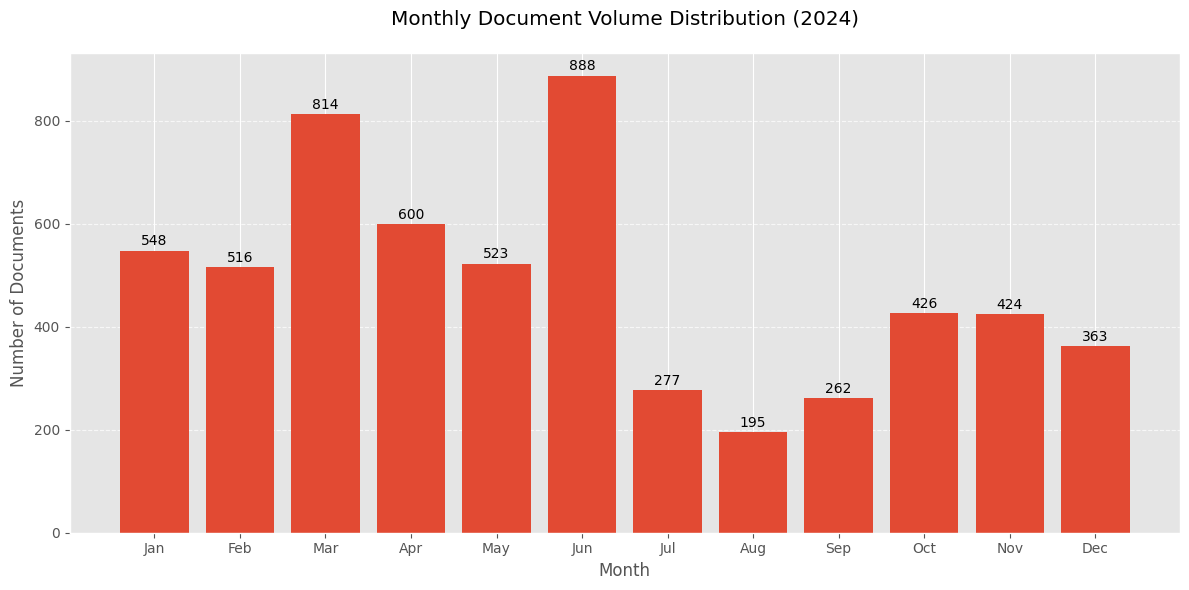


Monthly Document Counts:
-------------------------
Month  1:  548 documents
Month  2:  516 documents
Month  3:  814 documents
Month  4:  600 documents
Month  5:  523 documents
Month  6:  888 documents
Month  7:  277 documents
Month  8:  195 documents
Month  9:  262 documents
Month 10:  426 documents
Month 11:  424 documents
Month 12:  363 documents


In [45]:
# Create bar plot of monthly document volume
plt.figure(figsize=(12, 6))
plt.bar(range(1, 13), monthly_volume.values)

# Customize the plot
plt.title('Monthly Document Volume Distribution (2024)', pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Documents')

# Set x-axis labels to month names
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add value labels on top of each bar
for i, v in enumerate(monthly_volume.values):
    plt.text(i + 1, v + 10, str(v), ha='center')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print monthly totals
print("\nMonthly Document Counts:")
print("-" * 25)
for month, count in enumerate(monthly_volume.values, 1):
    print(f"Month {month:2d}: {count:4d} documents")

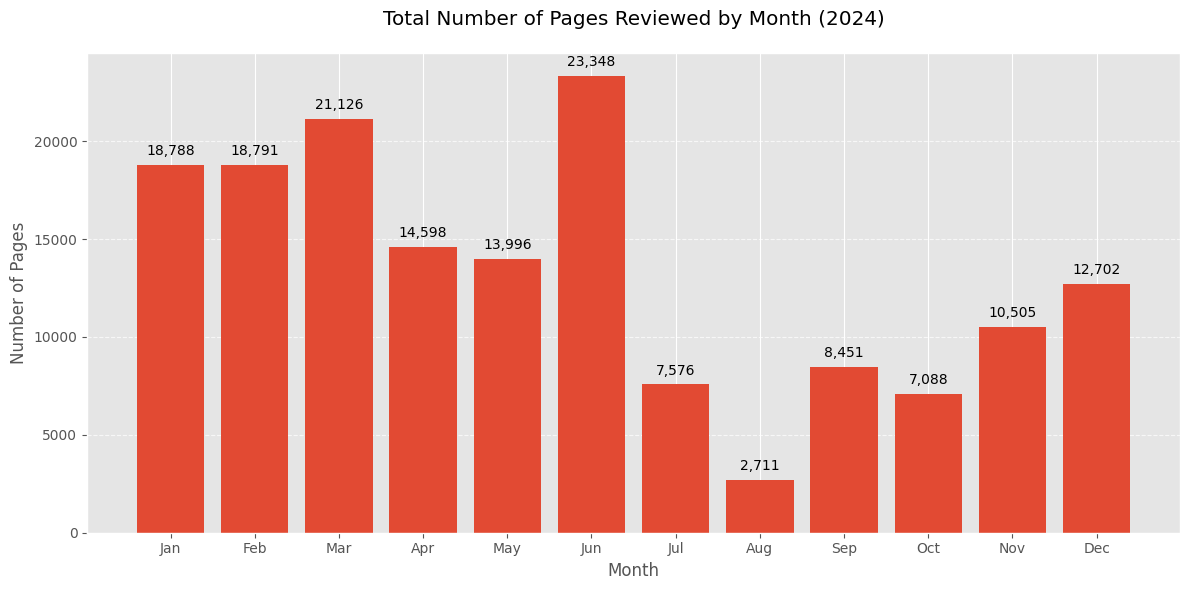


Monthly Page Counts:
-------------------------
Month  1: 18,788 pages
Month  2: 18,791 pages
Month  3: 21,126 pages
Month  4: 14,598 pages
Month  5: 13,996 pages
Month  6: 23,348 pages
Month  7: 7,576 pages
Month  8: 2,711 pages
Month  9: 8,451 pages
Month 10: 7,088 pages
Month 11: 10,505 pages
Month 12: 12,702 pages


In [46]:
# Calculate total pages by month
monthly_pages = df.groupby('Month')['Num of pages'].sum()

plt.figure(figsize=(12, 6))

# Create bar plot
plt.bar(range(1, 13), monthly_pages.values)

# Customize the plot
plt.title('Total Number of Pages Reviewed by Month (2024)', pad=20)
plt.xlabel('Month')
plt.ylabel('Number of Pages')

# Set x-axis labels to month names
plt.xticks(range(1, 13), 
          ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add value labels on top of each bar
for i, v in enumerate(monthly_pages.values):
    plt.text(i + 1, v + 500, f'{int(v):,}', ha='center')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print monthly totals
print("\nMonthly Page Counts:")
print("-" * 25)
for month, pages in enumerate(monthly_pages.values, 1):
    print(f"Month {month:2d}: {int(pages):,} pages")

In [47]:
print("Key Findings and Observations:\n")

print("1. Workload and Efficiency:")
print("- Total reviews processed: 5,836")
print("- Average review time: 0.77 days")
print("- Overall efficiency score: ~93% (based on 2-day target)")
print("- Peak workload months: March (814 reviews) and June (888 reviews)")
print("- Lowest workload months: August (195 reviews) and September (262 reviews)")

print("\n2. Reviewer Performance:")
print("- Most efficient reviewer: Les Anastasiou (100% efficiency, 0.14 avg days)")
print("- Highest volume reviewer: Paul Snook (2,002 reviews, 88.76% efficiency)")
print("- Most consistent performers: Rhys Davies (96.28% efficiency) and Phil Carr (92.64% efficiency)")

print("\n3. Document Types and Projects:")
print("- Most common document type: Test Runs/Evidence (1,644 reviews)")
print("- Most time-consuming projects: SAP S4 HANA V.2020 and ELN")
print("- Highest volume of multiple reviews: Electronic Laboratory Notebook (375) and SAP S4 HANA (361)")

print("\n4. Operational Insights:")
print("- Operational projects: 94.28% efficiency")
print("- Non-operational projects: 91.80% efficiency")
print("- Weekday distribution shows lower volume on weekends")
print("- Most efficient review days: Thursdays (0.55 days) and Fridays (0.98 days)")

print("\n5. Areas for Improvement:")
print("- Focus needed on reducing multiple reviews for key systems")
print("- Workload balancing across months could be optimized")
print("- Standardization of review processes across operational/non-operational projects")

Key Findings and Observations:

1. Workload and Efficiency:
- Total reviews processed: 5,836
- Average review time: 0.77 days
- Overall efficiency score: ~93% (based on 2-day target)
- Peak workload months: March (814 reviews) and June (888 reviews)
- Lowest workload months: August (195 reviews) and September (262 reviews)

2. Reviewer Performance:
- Most efficient reviewer: Les Anastasiou (100% efficiency, 0.14 avg days)
- Highest volume reviewer: Paul Snook (2,002 reviews, 88.76% efficiency)
- Most consistent performers: Rhys Davies (96.28% efficiency) and Phil Carr (92.64% efficiency)

3. Document Types and Projects:
- Most common document type: Test Runs/Evidence (1,644 reviews)
- Most time-consuming projects: SAP S4 HANA V.2020 and ELN
- Highest volume of multiple reviews: Electronic Laboratory Notebook (375) and SAP S4 HANA (361)

4. Operational Insights:
- Operational projects: 94.28% efficiency
- Non-operational projects: 91.80% efficiency
- Weekday distribution shows lower vol

In [48]:
# Save the DataFrame to Excel with a descriptive filename
output_path = r'C:\Users\dharris\Downloads\Data_2024_Analysis.xlsx'
df.to_excel(output_path, index=False)
print(f"DataFrame saved to: {output_path}")

DataFrame saved to: C:\Users\dharris\Downloads\Data_2024_Analysis.xlsx
